<h1>1.Imports</h1>


In [313]:

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import category_encoders as ce
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
from matplotlib import ticker
from yellowbrick.cluster import InterclusterDistance
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN


from math import ceil

In [314]:
from ydata_profiling import ProfileReport
from collections import Counter

from sklearn.metrics import silhouette_score, silhouette_samples
from scipy.stats import chi2_contingency
from phik import phik_matrix
from math import ceil
import os

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MeanShift
from sklearn.cluster import DBSCAN
from sklearn.cluster import estimate_bandwidth
from sklearn.mixture import GaussianMixture

from sklearn.base import clone
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
import graphviz

import sompy
from sompy.visualization.mapview import View2D
from sompy.visualization.bmuhits import BmuHitsView
from sompy.visualization.hitmap import HitMapView

#encoders
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

#scaler methods
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')


In [315]:
if os.getenv("COLAB_RELEASE_TAG"):
    print("Running in Colab")
    file_path = "https://raw.githubusercontent.com/Concurser/general-data/main/Case1_HotelCustomerSegmentation.csv"
else:
    print("NOT running inside Google Colab environment")
    # Use the local file path
    file_path = "Case1_HotelCustomerSegmentation.csv"

df = pd.read_csv(file_path,sep=';')
df

Running in Colab


ID Nationality   Age  DaysSinceCreation  \
0            1         PRT  52.0                440   
1            2         PRT   NaN               1385   
2            3         DEU  32.0               1385   
3            4         FRA  61.0               1385   
4            5         FRA  52.0               1385   
...        ...         ...   ...                ...   
111728  111729         DEU  31.0                 36   
111729  111730         BRA  43.0                 36   
111730  111731         BRA  37.0                 36   
111731  111732         DEU  48.0                 36   
111732  111733         DEU  48.0                 36   

                                                 NameHash  \
0       0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...   
1       0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...   
2       0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...   
3       0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...   
4       0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...   
...                                                   ...   
111728  0x2F59F0E86596B861C3303585FDB7F090B1B2D70442C5...   
111729  0x2708B9F11C95F384129152CDF0830B566F02D42B87AC...   
111730  0xEF5F6AAA6120F2AC49179E16FD12477C243A8F4FC504...   
111731  0xC70AE03F615CB96B0C84CF29419C2DDFE8EC64B77104...   
111732  0xE52EE501843E3108F20BB8F2EC180D8654DF1424EFA2...   

                                                DocIDHash  AverageLeadTime  \
0       0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...               59   
1       0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...               61   
2       0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...                0   
3       0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...               93   
4       0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...                0   
...                                                   ...              ...   
111728  0x86AC02B9393E7F58354BA4193D792C07DB91D4BE27C7...                0   
111729  0xE87DEB08B0D7D0BDC590949FF04AAA893018BD8EB714...              170   
111730  0x74B9B5A554F5F660371E56D4CE4C1D4C3DC80AE71D68...                0   
111731  0xF589C016E6988AECD3E3BE793E7D606BBDB6B6D4795C...               66   
111732  0xD539E89183AB389864B7A24B3C1FBC1FE20A40ED02E7...                0   

        LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
0               292.00          82.3                 1                 0   
1               280.00          53.0                 0                 0   
2                 0.00           0.0                 0                 0   
3               240.00          60.0                 0                 0   
4                 0.00           0.0                 0                 0   
...                ...           ...               ...               ...   
111728            0.00           0.0                 0                 0   
111729          755.25          20.0                 0                 0   
111730            0.00           0.0                 0                 0   
111731          708.00         185.0                 0                 0   
111732            0.00           0.0                 0                 0   

        BookingsCheckedIn  PersonsNights  RoomNights    DistributionChannel  \
0                       2              6           4              Corporate   
1                       1             10           5  Travel Agent/Operator   
2                       0              0           0  Travel Agent/Operator   
3                       1             10           5  Travel Agent/Operator   
4                       0              0           0  Travel Agent/Operator   
...                   ...            ...         ...                    ...   
111728                  0              0           0  Travel Agent/Operator   
111729                  1             10           5  Travel Agent/Operator   
111730                  0              0           0  Tra

<h1>2. Data Exploration </h1>

In [316]:
df.head()

ID Nationality   Age  DaysSinceCreation  \
0   1         PRT  52.0                440   
1   2         PRT   NaN               1385   
2   3         DEU  32.0               1385   
3   4         FRA  61.0               1385   
4   5         FRA  52.0               1385   

                                            NameHash  \
0  0x2C371FD6CE12936774A139FD7430C624F1C4D5109CE6...   
1  0x198CDB98BF37B6E23F9548C56A88B00912D65A9AA0D6...   
2  0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...   
3  0xC45D4CD22C58FDC5FD0F95315F6EFA5A6E7149187D49...   
4  0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...   

                                           DocIDHash  AverageLeadTime  \
0  0x434FD3D59469C73AFEA087017FAF8CA2296493AEABDE...               59   
1  0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...               61   
2  0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...                0   
3  0x8E59572913BB9B1E6CAA12FA2C8B7BF387B1D1F3432E...               93   
4  0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...                0   

   LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
0           292.0          82.3                 1                 0   
1           280.0          53.0                 0                 0   
2             0.0           0.0                 0                 0   
3           240.0          60.0                 0                 0   
4             0.0           0.0                 0                 0   

   BookingsCheckedIn  PersonsNights  RoomNights    DistributionChannel  \
0                  2              6           4              Corporate   
1                  1             10           5  Travel Agent/Operator   
2                  0              0           0  Travel Agent/Operator   
3                  1             10           5  Travel Agent/Operator   
4                  0              0           0  Travel Agent/Operator   

           MarketSegment  SRHighFloor  SRLowFloor  SRAccessibleRoom  \
0              Corporate            0           0                 0   
1  Travel Agent/Operator            0           0                 0   
2  Travel Agent/Operator            0           0                 0   
3  Travel Agent/Operator            0           0                 0   
4  Travel Agent/Operator            0           0                 0   

   SRMediumFloor  SRBathtub  SRShower  SRCrib  SRKingSizeBed  SRTwinBed  \
0              0          0         0       0              0          0   
1              0          0         0       0              0          0   
2              0          0         0       0              0          0   
3              0          0         0       0              0          0   
4              0          0         0       0              0          0   

   SRNearElevator  SRAwayFromElevator  SRNoAlcoholInMiniBar  SRQuietRoom  
0               0                   0                     0            0  
1               0                   0                     0            0  
2               0                   0                     0            0  
3               0                   0                     0            0  
4               0                   0                     0            0

In [317]:
print("This data set has",df.shape[1],"columns and", df.shape[0],"rows")

This data set has 29 columns and 111733 rows


In [318]:
df.ID.nunique()

111733

In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111733 entries, 0 to 111732
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    111733 non-null  int64  
 1   Nationality           111733 non-null  object 
 2   Age                   107561 non-null  float64
 3   DaysSinceCreation     111733 non-null  int64  
 4   NameHash              111733 non-null  object 
 5   DocIDHash             110732 non-null  object 
 6   AverageLeadTime       111733 non-null  int64  
 7   LodgingRevenue        111733 non-null  float64
 8   OtherRevenue          111733 non-null  float64
 9   BookingsCanceled      111733 non-null  int64  
 10  BookingsNoShowed      111733 non-null  int64  
 11  BookingsCheckedIn     111733 non-null  int64  
 12  PersonsNights         111733 non-null  int64  
 13  RoomNights            111733 non-null  int64  
 14  DistributionChannel   111733 non-null  object 
 15  

In [320]:
df.describe(include ='all').T

count  unique  \
ID                    111733.0     NaN   
Nationality             111733     199   
Age                   107561.0     NaN   
DaysSinceCreation     111733.0     NaN   
NameHash                111733  107584   
DocIDHash               110732  103480   
AverageLeadTime       111733.0     NaN   
LodgingRevenue        111733.0     NaN   
OtherRevenue          111733.0     NaN   
BookingsCanceled      111733.0     NaN   
BookingsNoShowed      111733.0     NaN   
BookingsCheckedIn     111733.0     NaN   
PersonsNights         111733.0     NaN   
RoomNights            111733.0     NaN   
DistributionChannel     111733       4   
MarketSegment           111733       7   
SRHighFloor           111733.0     NaN   
SRLowFloor            111733.0     NaN   
SRAccessibleRoom      111733.0     NaN   
SRMediumFloor         111733.0     NaN   
SRBathtub             111733.0     NaN   
SRShower              111733.0     NaN   
SRCrib                111733.0     NaN   
SRKingSizeBed         111733.0     NaN   
SRTwinBed             111733.0     NaN   
SRNearElevator        111733.0     NaN   
SRAwayFromElevator    111733.0     NaN   
SRNoAlcoholInMiniBar  111733.0     NaN   
SRQuietRoom           111733.0     NaN   

                                                                    top  \
ID                                                                  NaN   
Nationality                                                         FRA   
Age                                                                 NaN   
DaysSinceCreation                                                   NaN   
NameHash              0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...   
DocIDHash             0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...   
AverageLeadTime                                                     NaN   
LodgingRevenue                                                      NaN   
OtherRevenue                                                        NaN   
BookingsCanceled                                                    NaN   
BookingsNoShowed                                                    NaN   
BookingsCheckedIn                                                   NaN   
PersonsNights                                                       NaN   
RoomNights                                                          NaN   
DistributionChannel                               Travel Agent/Operator   
MarketSegment                                                     Other   
SRHighFloor                                                         NaN   
SRLowFloor                                                          NaN   
SRAccessibleRoom                                                    NaN   
SRMediumFloor                                                       NaN   
SRBathtub                                                           NaN   
SRShower                                                            NaN   
SRCrib                                                              NaN   
SRKingSizeBed                                                       NaN   
SRTwinBed                                                           NaN   
SRNearElevator                                                      NaN   
SRAwayFromElevator                                                  NaN   
SRNoAlcoholInMiniBar                                                NaN   
SRQuietRoom                                                         NaN   

                       freq        mean           std   min      25%      50%  \
ID                      NaN     55867.0  32254.683151   1.0  27934.0  55867.0   
Nationality           16516         NaN           NaN   NaN      NaN      NaN   
Age                     NaN   45.639191     17.244952 -10.0     33.0     47.0   
DaysSinceCreation       NaN  595.026599    374.657382  36.0    288.0    522.0   
NameHash                 75         NaN           NaN   NaN      NaN      NaN   
DocIDHash              3032

In [321]:
df.describe(include="object").T

count  unique  \
Nationality          111733     199   
NameHash             111733  107584   
DocIDHash            110732  103480   
DistributionChannel  111733       4   
MarketSegment        111733       7   

                                                                   top   freq  
Nationality                                                        FRA  16516  
NameHash             0x15A713CE687991691A18F6CDC56ABE24979C73CF5D51...     75  
DocIDHash            0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...   3032  
DistributionChannel                              Travel Agent/Operator  91019  
MarketSegment                                                    Other  63680

In [322]:
df.duplicated().sum()

0

In [323]:
df.columns

Index(['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'NameHash',
       'DocIDHash', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue',
       'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn',
       'PersonsNights', 'RoomNights', 'DistributionChannel', 'MarketSegment',
       'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom'],
      dtype='object')

<h1>3. Data preparation </h1>

In [324]:
# set ID as the index of our data set
df.set_index('ID', inplace=True)

In [325]:
# Drop old market segmentation as it shouldn't affect the new segmentation
df.drop('MarketSegment', axis=1, inplace=True)

In [326]:
df.columns

Index(['Nationality', 'Age', 'DaysSinceCreation', 'NameHash', 'DocIDHash',
       'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DistributionChannel', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom'],
      dtype='object')

<h2>3.1 Duplicates</h2>

In [327]:
df.duplicated().sum()

112

In [328]:
# drop the duplicates of our data set
df.drop_duplicates(inplace=True)


In [329]:
# drop customers which we don't have enough information and have never made a booking with the Hotel
# customers who are only part of the hotel fidelity program are not relevant to this analysis
df.drop(df[(df['DocIDHash'].isnull()) & (df['BookingsCheckedIn']==0)].index , inplace=True)

<h2>3.2 Coherence Checking</h3>

In [330]:
for feature in df.columns:
    print('For the feature', feature, 'the unique values are' , df[feature].unique())


For the feature Nationality the unique values are ['PRT' 'DEU' 'FRA' 'JPN' 'IRL' 'ESP' 'BEL' 'NLD' 'AUT' 'ITA' 'CHN' 'RUS'
 'POL' 'USA' 'HUN' 'CRI' 'MEX' 'CHE' 'ROU' 'GBR' 'BIH' 'BRA' 'FIN' 'AGO'
 'CAN' 'ZAF' 'TWN' 'GRC' 'AUS' 'ISR' 'BGR' 'SAU' 'SWE' 'ARG' 'ARM' 'CHL'
 'MAR' 'MOZ' 'KOR' 'TUN' 'DNK' 'NOR' 'MYS' 'EGY' 'IND' 'HRV' 'CPV' 'JOR'
 'COD' 'DZA' 'LUX' 'TUR' 'IRN' 'LBY' 'PAN' 'COL' 'VEN' 'GNB' 'CZE' 'AND'
 'SVN' 'PER' 'ATF' 'UGA' 'AZE' 'NZL' 'LTU' 'SRB' 'EST' 'KAZ' 'KWT' 'IDN'
 'UKR' 'SVK' 'MLI' 'ARE' 'BGD' 'THA' 'TZA' 'LVA' 'PHL' 'BHR' 'NAM' 'BOL'
 'CYP' 'SGP' 'CMR' 'MLT' 'URY' 'PAK' 'JAM' 'ECU' 'SYC' 'QAT' 'PRY' 'BRB'
 'OMN' 'TMP' 'ABW' 'LBN' 'AIA' 'SLV' 'DMA' 'CUB' 'VNM' 'GEO' 'IRQ' 'GAB'
 'PYF' 'LIE' 'SEN' 'BLR' 'ISL' 'DOM' 'GUY' 'LCA' 'ATA' 'NGA' 'RWA' 'CIV'
 'ALB' 'MKD' 'MNE' 'GTM' 'GHA' 'MDV' 'MCO' 'MUS' 'SYR' 'TGO' 'LKA' 'SUR'
 'KEN' 'MRT' 'HKG' 'CAF' 'NCL' 'STP' 'UZB' 'KIR' 'SDN' 'PRI' 'KNA' 'TJK'
 'SLE' 'LAO' 'COM' 'ETH' 'FRO' 'BEN' 'ZWE' 'ASM' 'BWA' 'ERI' 'SPM' 'JEY'
 

In [331]:
# Find duplicate rows based on 'Nationality', 'NameHash' and DocIDHash'
# customers with duplicate file information
duplicate_rows = df[df[['Nationality', 'DocIDHash','NameHash']].duplicated()]
duplicate_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3061 entries, 448 to 111718
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Nationality           3061 non-null   object 
 1   Age                   2857 non-null   float64
 2   DaysSinceCreation     3061 non-null   int64  
 3   NameHash              3061 non-null   object 
 4   DocIDHash             3061 non-null   object 
 5   AverageLeadTime       3061 non-null   int64  
 6   LodgingRevenue        3061 non-null   float64
 7   OtherRevenue          3061 non-null   float64
 8   BookingsCanceled      3061 non-null   int64  
 9   BookingsNoShowed      3061 non-null   int64  
 10  BookingsCheckedIn     3061 non-null   int64  
 11  PersonsNights         3061 non-null   int64  
 12  RoomNights            3061 non-null   int64  
 13  DistributionChannel   3061 non-null   object 
 14  SRHighFloor           3061 non-null   int64  
 15  SRLowFloor       

In [332]:
#keep only one information file for each customer with merged information from all the same customes files
#keep the most recent info on the preferences, sum the revenues and person/room nights and calculate nem average lead time


# Step 2: Iterate over duplicate rows and update values accordingly
for index, row in duplicate_rows.iterrows():
    # Find rows with the same 'Nationality', 'DocIDHash', and 'NameHash' but different 'DaysSinceCreation'
    duplicate_group = df[(df['Nationality'] == row['Nationality']) &
                         (df['DocIDHash'] == row['DocIDHash']) &
                         (df['NameHash'] == row['NameHash'])]

    # Find the row with minimum 'DaysSinceCreation'
    if not duplicate_group.empty:
        min_days_row = duplicate_group[duplicate_group['DaysSinceCreation'] == duplicate_group['DaysSinceCreation'].min()]

        # Aggregate values for specified columns
        aggregation_functions = {
            'LodgingRevenue': 'sum',
            'OtherRevenue': 'sum',
            'BookingsCanceled': 'sum',
            'BookingsNoShowed': 'sum',
            'BookingsCheckedIn': 'sum',
            'PersonsNights': 'sum',
            'RoomNights': 'sum',
            'AverageLeadTime': 'mean'
        }

        # Update values for specified columns
        for col in aggregation_functions.keys():
            df.loc[min_days_row.index, col] = duplicate_group[col].agg(aggregation_functions[col])

        # Drop duplicate rows except the one with minimum 'DaysSinceCreation'
        df.drop(duplicate_group.index[duplicate_group.index != min_days_row.index[0]], inplace=True)

# Reset index
df.reset_index(drop=True, inplace=True)

In [333]:
# check people that have negative age
df[(df["Age"] < 0)]

Nationality   Age  DaysSinceCreation  \
1924          BIH  -6.0               1324   
2296          ATF  -6.0               1319   
4868          FRA  -8.0               1271   
6439          GBR -10.0               1243   
8000          DEU  -6.0               1217   
8263          NLD  -9.0               1213   
9502          DZA  -5.0               1193   
10202         DEU  -9.0               1181   
10233         DEU  -9.0               1181   
10294         PRT  -5.0               1181   
13750         PRT  -9.0               1127   
14506         DEU -10.0               1117   
19635         USA  -8.0               1022   
55071         PRT  -5.0                510   

                                                NameHash  \
1924   0xB715504C2E85AA4DDCA6A8B149CB79F73F401C5344A0...   
2296   0x37BDAE928BB1B43CF2DF052D72361EDEB60912B1CEB5...   
4868   0x98C0A7B15C1EFE465B2F49992DDB2AEEBD6E36544A8D...   
6439   0x8CCCC4A546151AF5A0B1AFF3217ED72A8AC7E3057BD2...   
8000   0x4E8F0C5ECDEB3D0AD6E10C95F3910287EE9DD117142C...   
8263   0x8BDF931F9F0B596E6227153308A564EEC6D84E74EA5B...   
9502   0x4DD3955FC0A0B80633A72A1F6F2A855615F39DEC5BC1...   
10202  0x92501E90A1E834DCAB204F4CC11FE3DAE5AC269FE298...   
10233  0x8951768FA5231187E60D24B3540271A2693FDDA0D8EC...   
10294  0x5EE2C0A0277DCB4FA8ADEADA1889B116070A5AC36018...   
13750  0x1CAB5F2499541D0D158D45EF7EC4525F147E3AFAA9B0...   
14506  0x4E45A8F302884C4BE0498083911400F8A51BF317A3EE...   
19635  0x23B02122A0D6AEEB4872A49A6F0E4A2CCBC300132F62...   
55071  0xF2DF77C067923E3F30163F06FEF52D6CAE6C5E6D9286...   

                                               DocIDHash  AverageLeadTime  \
1924   0x9ED63F460C900B662B890A825398EA74E2AB649383BB...              0.0   
2296   0x335624ED7784B64693ACA7AE496D17AB8B4D1FECB0FA...              0.0   
4868   0x8E0392C5D36615A020644CC4B910B7F95C4CA6E919E0...             66.0   
6439   0xE4BA150277C08ADEE04304BE69BBB15790BD8A3F31D8...             22.0   
8000   0xF33AEF1FC174F89346F4BE36A0B0850B264802C28A00...            256.0   
8263   0x8A51E2916F605B51E90ADC7538FD1A0B5770DAB53A78...            111.0   
9502   0xD3EBA3BD3BFCB1E5F8E31DCA5E31DC4E0F50C5029C22...             54.0   
10202  0x5259A45D8A6404579086892C6E99A8436D4C87EF838C...            292.0   
10233  0x1020D6B8DF33486CC701BEB0173833E5FA028482395F...            292.0   
10294  0x62F41BDB35750405347C6BF370EFDA9C243E668F03F7...            292.0   
13750  0x1E7889105D403E16866352792818A8745CAF70514A8E...            346.0   
14506  0xED40A2468984E298030A9DCCB5BAA60B3979D4609383...            276.0   
19635  0xFF56C9E19DB6127BD88C2F3871DEBE8DF7262273C53A...            163.0   
55071  0x0D08FA5E2B1E941F2C2086205693E8EEE7BC84D762FB...            130.0   

       LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
1924             0.00          0.00                 0                 0   
2296             0.00          0.00                 0                 0   
4868            93.30         14.00                 0                 0   
6439           450.00         18.00                 0                 0   
8000           126.00        109.00                 0                 0   
8263           414.60         34.00                 0                 0   
9502           138.93         29.50                 0                 0   
10202          126.00        113.00                 0                 0   
10233          128.00         57.50                 0                 0   
10294          128.00         55.00                 0                 0   
13750          128.00         53.00                 0                 0   
14506          240.00         61.25                 0                 0   
19635          939.60        303.30                 0                 0   
55071          388.80         47.20                 0                 0   

       BookingsCheckedIn  PersonsNights  RoomNights    DistributionChannel  \
1924                   0              0           0  T

In [334]:
# drop people that have negative age
df.drop(df[(df["Age"] < 0)].index, inplace=True)

In [335]:
# check people that have age under 18
df[(df["Age"] < 18)]

Nationality   Age  DaysSinceCreation  \
32             PRT   4.0               1385   
64             FRA  14.0               1385   
78             ESP   4.0               1384   
84             ESP   7.0               1384   
107            FRA  14.0               1384   
...            ...   ...                ...   
107390         DEU  15.0                 39   
107397         ESP   8.0                 39   
107443         PRT   7.0                 39   
107540         PRT  15.0                 37   
107581         BRA   1.0                 37   

                                                 NameHash  \
32      0xD01C4194E347210450E554E5862B791E1DF97238D0DA...   
64      0xDC70BB4054DF5B81FDBD240A60EF5C7BD20A259ACC48...   
78      0x56A42753E724C20D97AFC90256FBB406DBEAADD0DBD8...   
84      0xF12F01F9738A807C082A3C58E0B6BCB986D515999726...   
107     0xA21EFEEA4828AAA5BB12CAF98CE7722490EFB5BDBD40...   
...                                                   ...   
107390  0x81E1BB5FFB63EA5B5F475FAF29D2D0631FF6B0F765AF...   
107397  0x26113DE7770BFACD12DD3AB50C5761386EC4CAB5C58D...   
107443  0xA8F3B9169C48701325ED69D34B5527B9335FD2E072EB...   
107540  0xEECAA0A032867CFB55D49E61A232D3782AA7308C1ACF...   
107581  0x027961CB4D803810B2E3A01C7DCBB9327DFD42847E19...   

                                                DocIDHash  AverageLeadTime  \
32      0xB8795BBF0ECC91EBA93C4D34FDC7EE1D04602ECE7172...              0.0   
64      0x512B4D409945C7825E69A7EE3829983DEB275509BFCC...              0.0   
78      0xDC0D71D5D2B392DDC83D0065D409681BE9C745ECE97B...            103.0   
84      0x8840ED8674C90FD4FADDB7C5B687FAC0334EBAFD4E0E...              0.0   
107     0xE63E20EE75B723540DC27300EA29FF42D0E46B18A2C3...              0.0   
...                                                   ...              ...   
107390  0x0EA071333B81683A25596E7445E2B9C04A3A430A7109...             31.0   
107397  0x6077B7E310A86FA92B563BB989C3E14333C3FBC0146A...              0.0   
107443  0xDDB597CFA41D4D4B7F44B4EC2FD04CDE59163DC484A6...              0.0   
107540  0xD058D8270A17A46CF4987CD3A0FE941C953C73C2201B...              0.0   
107581  0x0B20CEE8F6F9FD9A484D20A280989679B703E78FB25E...              0.0   

        LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
32                 0.0           0.0                 0                 0   
64                 0.0           0.0                 0                 0   
78               653.4         759.6                 0                 0   
84                 0.0           0.0                 0                 0   
107                0.0           0.0                 0                 0   
...                ...           ...               ...               ...   
107390          2436.0         247.5                 0                 0   
107397             0.0           0.0                 0                 0   
107443             0.0           0.0                 0                 0   
107540             0.0           0.0                 0                 0   
107581             0.0           0.0                 0                 0   

        BookingsCheckedIn  PersonsNights  RoomNights    DistributionChannel  \
32                      0              0           0                 Direct   
64                      0              0           0  Travel Agent/Operator   
78                      1              8           4                 Direct   
84                      0              0           0                 Direct   
107                     0              0           0                 Direct   
...                   ...            ...         ...                    ...   
107390                  1              4           4  Travel Agent/Operator   
107397                  0              0           0  Travel Agent/Operator   
107443                  0              0           0  Travel Agent/Operator   
107540                  0              0           0                 

In [336]:
# drop people that have age under 18
df.drop(df[(df["Age"] < 18)].index, inplace=True)

In [337]:
#check negative values for Average Lead time
df[(df["AverageLeadTime"] < 0)]


Nationality   Age  DaysSinceCreation  \
22191          PRT   NaN                964   
28330          USA  25.0                870   
49352          CHN  33.0                558   
56320          FRA  57.0                499   
56327          FRA  62.0                499   
56340          FRA  61.0                499   
58159          ESP  46.0                485   
60160          USA  70.0                468   
65712          GBR  46.0                424   
69760          BRA  31.0                394   
106637         NLD  28.0                 45   
107464         DEU  77.0                 38   
107465         ISL  38.0                 38   

                                                 NameHash  \
22191   0x498F10CD065519D5A08A680309214C7911457CF2A5CC...   
28330   0xEEE451C018A695CC592A21016B9713CCE1CAD0CEF039...   
49352   0x61B41490861314B7148F76EE7D7E17A240A86B45259D...   
56320   0x7E60C14F1CDF540841373495CA352FA8579EA1166911...   
56327   0x8F817FC15C5606A27141C5FF717456FA9D3D7CE71A48...   
56340   0x7DD53BA3E94C8D8B171B9D50041DC3A23E6F4752A3A8...   
58159   0xBBBA5623819CD060BB49D9D700348FFEF885F825D019...   
60160   0x4567E92118939CF20A432369E32BA8959502682AD473...   
65712   0x2FFEF9FB8750A5B78550558BCAB6E6FE0EEFB92B53F9...   
69760   0xCD4216685825A5A65B100A4F8F19366A23B2BDDE8E29...   
106637  0x3EF57FE4B2C2A74A125FAEF2BF176C04F5DEEDB842E4...   
107464  0x63B94AAFC7D25DD6266BA78C6EB2D7344B679076C083...   
107465  0xD411E3919528FF150608FF9FF335BE5972F18AF11C10...   

                                                DocIDHash  AverageLeadTime  \
22191   0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...             -1.0   
28330   0x855CC6ADF35259086B24B2639DD34563A20FD464BF0B...             -1.0   
49352   0x4CDEF046A3A97AAC6BD603F2250C8ACCB068C39995C4...             -1.0   
56320   0xD3D49D29C16B32E2DF23CB16128500175E12671B6DD3...             -1.0   
56327   0xE71E1E35741B667B50E3BDAD6AE5AE2283DDA0FE50F5...             -1.0   
56340   0x814B89362FCA5770AEDC4485136D7F673F78793CE218...             -1.0   
58159   0x54D0B32490EA6DAB16F26AFBDAD5037A89E1BDA62B54...             -1.0   
60160   0x2A1EA7292AF2D9BB083726E0961A38A54950480886BA...             -1.0   
65712   0x8FDCAADFD9772221E36C47D962BF5BEFC049103778EC...             -1.0   
69760   0x43126A8B69B8B1E3C1D4513EE586ABE2910947964929...             -1.0   
106637  0x87FA9C39B0CD30CE3BEE596173C32F38D36403A0E914...             -1.0   
107464  0xBC92AFD5D326506F5E9765C869DEBD8EFA2287F113F9...             -1.0   
107465  0xD17AD77E6F0858EF6E47DC6058BED7E0F190725569A9...             -1.0   

        LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
22191           352.00          30.0                 0                 0   
28330            77.49           3.0                 0                 0   
49352           129.00           2.0                 0                 0   
56320           149.00           2.0                 0                 0   
56327           149.00           2.0                 0                 0   
56340           149.00           2.0                 0                 0   
58159           159.00           2.0                 0                 0   
60160            95.20           2.0                 0                 0   
65712           282.00          24.0                 0                 0   
69760           209.00           2.0                 0                 0   
106637          227.00          16.0                 0                 0   
107464           71.50           4.0                 0                 0   
107465           71.50           4.0                 0                 0   

        BookingsCheckedIn  PersonsNights  RoomNights    DistributionChannel  \
22191                   1              2           1  Travel Agent/Operator   
28330                   1              3           1  Travel Agent/Operator   
49352                   1              2           1  Travel Agent/Operator   
56320              

In [338]:
#replace the average lead time with 0 for those with -1, assuming it was mistake and the -1 meant a booking made on arrival
df['AverageLeadTime'][(df['AverageLeadTime']<0)] = 0


In [339]:
# check people usually order more than one type of room
df[(df['SRHighFloor'] + df['SRLowFloor'] + df['SRMediumFloor'] + df['SRAccessibleRoom']) > 1]

Nationality   Age  DaysSinceCreation  \
24908         SWE  51.0                921   
25174         PRT   NaN                916   
26806         GBR  45.0                891   
30444         GBR  53.0                837   

                                                NameHash  \
24908  0x70B6FD2D234235C3DE6F4B82879F6305D0E111670AB0...   
25174  0xD9D619554D9AADB4D47DBAD05FA8DC655F924173367F...   
26806  0x1AF54B13068BC4F019B15A1634A3058DCF8CB3BCE045...   
30444  0x893C70F8BD82955657FE723FC23326C4434A5DC0E467...   

                                               DocIDHash  AverageLeadTime  \
24908  0xB524FBB5D5127698F6E182836043FBA8CCD397612416...            127.0   
25174  0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...             74.0   
26806  0x3FE43086574BC0D49ECCE2AE3E9A864449F438F860A5...             90.0   
30444  0xD9459EA20750231005BDCDA7C43F4448B4D9BB605B16...            125.0   

       LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
24908         2020.00         220.0                 0                 0   
25174          506.25          92.5                 0                 0   
26806          114.00          14.0                 0                 0   
30444          251.10         103.0                 0                 0   

       BookingsCheckedIn  PersonsNights  RoomNights    DistributionChannel  \
24908                  1              8           2  Travel Agent/Operator   
25174                  1             15           5                 Direct   
26806                  1              2           1  Travel Agent/Operator   
30444                  1              6           3                 Direct   

       SRHighFloor  SRLowFloor  SRAccessibleRoom  SRMediumFloor  SRBathtub  \
24908            1           0                 0              1          0   
25174            1           1                 0              0          0   
26806            0           1                 0              1          0   
30444            0           1                 1              0          0   

       SRShower  SRCrib  SRKingSizeBed  SRTwinBed  SRNearElevator  \
24908         0       0              1          0               0   
25174         0       0              1          0               0   
26806         0       0              0          0               0   
30444         0       0              0          0               0   

       SRAwayFromElevator  SRNoAlcoholInMiniBar  SRQuietRoom  
24908                   0                     0            0  
25174                   0                     0            1  
26806                   0                     0            1  
30444                   0                     0            0

In [340]:
# drop people usually order more than one type of room because it doesnt make sense
df.drop(df[(df['SRHighFloor'] + df['SRLowFloor'] + df['SRMediumFloor'] + df['SRAccessibleRoom']) > 1].index, inplace=True)

In [341]:
# check people usually order more than one type of bathroom
df[(df['SRShower'] + df['SRBathtub']) > 1]

Empty DataFrame
Columns: [Nationality, Age, DaysSinceCreation, NameHash, DocIDHash, AverageLeadTime, LodgingRevenue, OtherRevenue, BookingsCanceled, BookingsNoShowed, BookingsCheckedIn, PersonsNights, RoomNights, DistributionChannel, SRHighFloor, SRLowFloor, SRAccessibleRoom, SRMediumFloor, SRBathtub, SRShower, SRCrib, SRKingSizeBed, SRTwinBed, SRNearElevator, SRAwayFromElevator, SRNoAlcoholInMiniBar, SRQuietRoom]
Index: []

In [342]:
# check people usually order more than one type of bed
df[(df['SRKingSizeBed'] + df['SRTwinBed']) > 1]

Nationality   Age  DaysSinceCreation  \
2677           PRT  55.0               1313   
7781           PRT   NaN               1221   
7829           USA  62.0               1220   
8938           PRT   NaN               1203   
10045          FRA  50.0               1184   
...            ...   ...                ...   
102782         ESP  19.0                 75   
107419         BEL  33.0                 39   
107420         BEL  34.0                 39   
107439         BEL  35.0                 39   
107440         BEL  34.0                 39   

                                                 NameHash  \
2677    0xA5D039F70E8A2779E22D1D1BECC29B923483734390EC...   
7781    0xAFCBC781C3C62AA20C40BC4A9236F37221B3F85576E9...   
7829    0x7923EDCD5BC71D2CCE19513BB3079406A2F1B603EF91...   
8938    0x73BC35888B13AC2D1C5715A00B38DC8D5B8285AD498D...   
10045   0x981B03B6FD2FCEBCB5E54EAE8BFDD397CBE84562C12F...   
...                                                   ...   
102782  0xCBA71BB46B6E02AD1F55F45D244130BA0A0636DE803D...   
107419  0x3CD8BB1E0F0367C1F0CECA92BA5DD2946529A846B77C...   
107420  0x44C200EA8760FFE7537B37CBEF3BC2EDAA1CF558D268...   
107439  0x2FCF7819C1196695B1A058F7CC4C627A7936C7EEE5A6...   
107440  0xE437EB0953EBFAE9DD14FE0BFA4D491233D3B81E60B5...   

                                                DocIDHash  AverageLeadTime  \
2677    0xE9499E4467251E85516B5F551140F7ED96FA6CFAC663...              3.0   
7781    0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...             98.0   
7829    0x99A9382737FD769432B993BA6E9BB010EB20440ACE26...            120.0   
8938    0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...            154.0   
10045   0xE8790486E4F8BB3A424DF6DFA8BF588CA7A88655DFF0...             37.0   
...                                                   ...              ...   
102782  0x6F257933F50E204EB2CF4FBCAC0200CE11CB92CF33DC...             91.0   
107419  0x29FD8A5CFB9EF74864A2CB925296C9EBF18558B9F562...            133.0   
107420  0xFF6567D31448E686A961FC4D25FDC3F40DC6E96B56B7...              0.0   
107439  0xB272D38A99FF5E512CC543333A9BC6F0F82BE1AA3C7A...            133.0   
107440  0x156DF82EC993064B49AF55F38B8FF1D08C0F1346C402...              0.0   

        LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
2677              50.0          80.0                 0                 0   
7781             348.3          19.0                 0                 0   
7829             128.1          18.0                 0                 0   
8938             450.9          93.0                 0                 0   
10045           1517.1         177.0                 0                 0   
...                ...           ...               ...               ...   
102782          1681.2         192.0                 0                 0   
107419          1000.5         116.0                 0                 0   
107420             0.0           0.0                 0                 0   
107439          1000.5         128.0                 0                 0   
107440             0.0           0.0                 0                 0   

        BookingsCheckedIn  PersonsNights  RoomNights    DistributionChannel  \
2677                    1              3           1                 Direct   
7781                    1              6           3  Travel Agent/Operator   
7829                    1              3           1  Travel Agent/Operator   
8938                    1             12           3  Travel Agent/Operator   
10045                   1             28           7                 Direct   
...                   ...            ...         ...                    ...   
102782                  1              8           4  Travel Agent/Operator   
107419                  1             14           7  Travel Agent/Operator   
107420                  0              0           0  Travel Agent/Operator   
107439                  1             14           7  Travel Agent/Op

In [343]:
# drop people usually order more than one type of bed because it doesnt make sense
df.drop(df[(df['SRKingSizeBed'] + df['SRTwinBed']) > 1].index, inplace=True)

In [344]:
#check coherence between PersonNights and RoomsNights
#as even in 1 to 1 situation there should never be more PersonNights than RoomNights
df[(df['PersonsNights'] < df['RoomNights'])].iloc[:, 2:]

DaysSinceCreation                                           NameHash  \
2647                 1314  0xDCA87EABFF56A1A313E731ED676F25361722AB5AE790...   
3974                 1288  0x84DF93E126886E0003E45A8B0A1127EDDDA6A3BEC276...   
14807                1112  0xF4F7ED49904EB1F7A72F33A071F96CE533019C81DF96...   
16394                1088  0xE779FF69A9BC8AA6FE091759A095386C0E2A8F680DA8...   
18182                1058  0x382BF2A6BF57870D9831631A7ACA7B30CB42FE9FEEDF...   
18280                1057  0x82FDEEE5403B80470AABEC952A25DB7D37BEF253BD5C...   
26136                 901  0x04F37DBBE0138585CD31BC820E2C780F992915176507...   
26788                 892  0xF2A1083BA0F2D0B18B86816CD820DAD61C3818A4A828...   
42182                 641  0x65E5986F79B75C8A171FEEA2E534AAD806D5ACB083D6...   
43202                 625  0xA54BF56198FA66C8414FE1AEB3680DC262B8EE9ACC21...   
49187                 560  0x4FC57FA3A9C4A4096E55BFD5AACE40D3627748CB65E4...   
51671                 539  0xDF5D8EAC38850FC98D7D5822110B10A44662D9D92279...   
57602                 489  0xFB5F026540ECB47362289BB2507D92BED41D80F632F6...   
60438                 466  0x7A8179ADB882FC633830D7EABDCD64D41B3CD539FEA2...   
65417                 426  0x27749A514C58DA6E2F5544303DD02E378631187B08EF...   
72023                 377  0x14A77C11BA7C3B13207E72D4BA395580338D206DCA65...   
76811                 336  0x0596170AE19299CB3CEBA98BC2FAF9BF5333031C6A32...   
78123                 319  0x3CBB385BBFE0BCBAC87A0F4FE0BFA648DE33905384F4...   
86723                 214  0xFC913F891030DD576FDA085E7859D44AB7EE8B000D59...   
93521                 155  0x5015AE870F1DEECA791D3744CD4ED3CAA95B22C43A5B...   
97393                 121  0x53FB0EB1CE1FD50424F79500C54F8149081D5A3D82F6...   
99483                 103  0xD9A501DB0F0303E3FD9B2FCD27B28411ACE0486F77C0...   
106996                 42  0xFB64B4B6AB53A6A549A620009CA24A1C3A668A460D87...   

                                                DocIDHash  AverageLeadTime  \
2647    0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...         8.000000   
3974    0x08007328E88BA93B551B9F9F056AAFE2C00E94CCEE69...        75.000000   
14807   0x6541AF2C1E55C2D3EC17E89DEDD22FE0EBB47AB92305...         0.000000   
16394   0x4DA48EED943299176444C244EAA74FACB04E8E66DE82...        38.000000   
18182   0xF728641F469966A5AA8906B76CC8C3083A0BDEC9F24F...        34.000000   
18280   0xA0EA86D350113A03143831212044DE6CE61C2484CB18...        17.000000   
26136   0x3FAE56E6A0168E9130F12E58CF45CDAAE18477EF809C...         7.000000   
26788   0xFF1985F366C218F0D7D8280480B6B8AD82CAF6092799...        10.000000   
42182   0x67D8A25C96313AEF8A5842A87F2F6AB29DE01DAC80BE...        41.000000   
43202   0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...         6.000000   
49187   0xE2836653FBF39129A11F69F1FC6635CCCD8FA5C7A5E1...        14.000000   
51671   0xA508EDBFE269E231546629F11587FA2AAD4DE4851A31...         4.000000   
57602   0x28D83B97B0D5B78BCBA1C36FDF79FF276A1E32C9CB5C...         0.000000   
60438   0x5DC0150F4FDDED43B313C3782560597AC6665A129EF5...         3.000000   
65417   0x9E0C31D4C3A418F0B4E063504160A0B33D51C6ABA0A4...        97.000000   
72023   0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...        69.000000   
76811   0x8186236B5A280E296DC622D0B419BBEBB5BC8E1D4338...        63.000000   
78123   0x849546932E0ABE7515ECA03635FD1334BBBCC41E0AFD...         0.000000   
86723   0x050B3FEBB73D2924810D9C068846F14550B03BCFDC7C...        36.000000   
93521   0xBEDD3BDEFDC2F17B6B52D1133594F2A0A60D7D665DEB...         0.000000   
97393   0x27A6504F8E07DC750D565994E86CB3837146A501E609...        15.250000   
99483   0xE3B0C44298FC1C149AFBF4C8996FB92427AE41E4649B...         5.000000   
106996  0x2B17E9D2CCEF2EA0FE752EE345BEDFB06741FFC8ECEC...        34.066667   

        LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
2647              0.00       5105.50                 0                 0   
3974            138.00         38.50                 0        

In [345]:
#drop where PersonNIghts are less than RoomNights as it doesn't make sense
df.drop(df[(df['PersonsNights'] < df['RoomNights'])].index, inplace=True)

In [346]:
# check people who never booked a stay in the Hotel
df[(df['BookingsNoShowed']==0) & (df['BookingsCanceled']==0) & (df['BookingsCheckedIn']==0)]

Nationality   Age  DaysSinceCreation  \
2              DEU  32.0               1385   
4              FRA  52.0               1385   
6              JPN  50.0               1385   
8              FRA  43.0               1385   
10             IRL  28.0               1385   
...            ...   ...                ...   
107622         ITA  56.0                 37   
107624         PAN  60.0                 37   
107627         DEU  31.0                 36   
107629         BRA  37.0                 36   
107631         DEU  48.0                 36   

                                                 NameHash  \
2       0xDA46E62F66936284DF2844EC4FC542D0DAD780C0EE0C...   
4       0xD2E3D5BFCA141865669F98D64CDA85AD04DEFF47F8A0...   
6       0x94DB830C90A6DA2331968CFC9448AB9A3CE07D7CFEDD...   
8       0x44BB41EF2D87698E75B6FBB77A8815BF48DAA912C140...   
10      0x606584F7B9D6A1905BF9B7ED7B7EBE5DF17DF22FECDF...   
...                                                   ...   
107622  0x82277FA4AD074DA9786E64E977C94FEF1C2E47CD6212...   
107624  0xAA3529E305173010BADE927C7015FA091C3883D257E9...   
107627  0x2F59F0E86596B861C3303585FDB7F090B1B2D70442C5...   
107629  0xEF5F6AAA6120F2AC49179E16FD12477C243A8F4FC504...   
107631  0xE52EE501843E3108F20BB8F2EC180D8654DF1424EFA2...   

                                                DocIDHash  AverageLeadTime  \
2       0x27F5DF762CCDA622C752CCDA45794923BED9F1B66300...              0.0   
4       0x42BDEE0E05A9441C94147076EDDCC47E604DA5447DD4...              0.0   
6       0x47E5E4B21585F1FD956C768E730604241B380EDFEA68...              0.0   
8       0x6C456E45A78A20BC794137AE326A81D587B6528B3944...              0.0   
10      0xCA46CD508DB3DB2085374141177E07ECEC4B724AE41C...              0.0   
...                                                   ...              ...   
107622  0x5ED6055421E857EA3496D4C75FA2237ACD353DB1B64B...              0.0   
107624  0xDC47997245A7B9ACF9D4974149D2100CEB00981A2F03...              0.0   
107627  0x86AC02B9393E7F58354BA4193D792C07DB91D4BE27C7...              0.0   
107629  0x74B9B5A554F5F660371E56D4CE4C1D4C3DC80AE71D68...              0.0   
107631  0xD539E89183AB389864B7A24B3C1FBC1FE20A40ED02E7...              0.0   

        LodgingRevenue  OtherRevenue  BookingsCanceled  BookingsNoShowed  \
2                  0.0           0.0                 0                 0   
4                  0.0           0.0                 0                 0   
6                  0.0           0.0                 0                 0   
8                  0.0           0.0                 0                 0   
10                 0.0           0.0                 0                 0   
...                ...           ...               ...               ...   
107622             0.0           0.0                 0                 0   
107624             0.0           0.0                 0                 0   
107627             0.0           0.0                 0                 0   
107629             0.0           0.0                 0                 0   
107631             0.0           0.0                 0                 0   

        BookingsCheckedIn  PersonsNights  RoomNights    DistributionChannel  \
2                       0              0           0  Travel Agent/Operator   
4                       0              0           0  Travel Agent/Operator   
6                       0              0           0  Travel Agent/Operator   
8                       0              0           0  Travel Agent/Operator   
10                      0              0           0  Travel Agent/Operator   
...                   ...            ...         ...                    ...   
107622                  0              0           0  Travel Agent/Operator   
107624                  0              0           0  Travel Agent/Operator   
107627                  0              0           0  Travel Agent/Operator   
107629                  0              0           0  Travel Agent/Op

In [347]:
# drop customers who never booked a stay as they won't be relevant for the analysis
df.drop(df[(df['BookingsNoShowed']==0) & (df['BookingsCanceled']==0) & (df['BookingsCheckedIn']==0)].index, inplace=True)

<h2>3.3 Defining metric and non_metric features</h2>

In [348]:
df.columns

Index(['Nationality', 'Age', 'DaysSinceCreation', 'NameHash', 'DocIDHash',
       'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DistributionChannel', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom'],
      dtype='object')

In [349]:
df.drop('NameHash', axis=1, inplace=True)
df.drop('DocIDHash', axis=1, inplace=True)

In [350]:
#Defining metric and non metric features
metric_features = ['Age', 'DaysSinceCreation',
        'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue',
       'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn',
       'PersonsNights', 'RoomNights']

non_metric_features = df.columns.drop(metric_features).tolist()

In [351]:
len(df.columns), len(metric_features), len(non_metric_features)

(25, 10, 15)

<h2>3.4 Treating Missing/Strange Values </h2>

In [352]:
# Check all missing values
missing_values = df.isna().sum()

# Calculate the percentage of missing values
percentage_missing = (missing_values / df.shape[0]) * 100

# Combine the results into a new DataFrame for better readability
missing_data_summary = pd.DataFrame({
    'Variable': missing_values.index,
    'Missing Values': missing_values.values,
    'Percentage Missing': percentage_missing.values
})

# Display the summary
print(missing_data_summary)

                Variable  Missing Values  Percentage Missing
0            Nationality               0            0.000000
1                    Age            2814            3.756759
2      DaysSinceCreation               0            0.000000
3        AverageLeadTime               0            0.000000
4         LodgingRevenue               0            0.000000
5           OtherRevenue               0            0.000000
6       BookingsCanceled               0            0.000000
7       BookingsNoShowed               0            0.000000
8      BookingsCheckedIn               0            0.000000
9          PersonsNights               0            0.000000
10            RoomNights               0            0.000000
11   DistributionChannel               0            0.000000
12           SRHighFloor               0            0.000000
13            SRLowFloor               0            0.000000
14      SRAccessibleRoom               0            0.000000
15         SRMediumFloor

In [353]:
# Calculate the total number of rows in the original DataFrame
total_rows = len(df)

# Filter out rows based on specified conditions
dropped_rows_indices = df[(df['BookingsCheckedIn'] == 0) &
                         (df['BookingsCanceled'] == 0) &
                         (df['BookingsNoShowed'] == 0) &
                         (df['LodgingRevenue'] == 0) &
                         (df['OtherRevenue'] == 0) &
                         (df['RoomNights'] == 0) &
                         (df['PersonsNights'] == 0)].index

# Drop the rows from the DataFrame
df.drop(dropped_rows_indices, inplace=True)

# Calculate the percentage of data dropped
percentage_dropped = ((total_rows - len(df)) / total_rows) * 100

# Print the percentage of data dropped
print(f"Percentage of data dropped: {percentage_dropped:.2f}%")

Percentage of data dropped: 0.00%


<h4> Age </h4>
__________________________________________________________

In [354]:
#Fill the missing values of Age by the mean of age of each Nationality
df['Age'] = df.groupby('Nationality')['Age'].transform(lambda x: x.fillna(x.mean()))

In [355]:
df["Age"].isna().sum()

0

In [356]:
#After filling missing values on age, so we can have only integers and not for example age 43.12345
df['Age']= df['Age'].astype(int)

<h4> Nationality </h4>
__________________________________________________________

In [357]:
df["Nationality"].value_counts()

FRA    11093
DEU    10142
PRT    10083
GBR     7754
ESP     4324
       ...  
JEY        1
MDG        1
SWZ        1
SOM        1
GRD        1
Name: Nationality, Length: 181, dtype: int64

In [358]:
# create a feature that a person is from portugal or not
df['Foreigner'] = df['Nationality'].apply(lambda x: 0 if x == 'PRT' else 1)
non_metric_features.append('Foreigner')

In [359]:
# Update the nationality_to_continent mapping to specify only European countries and continents for the rest
nationality_to_continent = {
    #  countries specified by name
    'AND': 'Andorra', 'AUT': 'Austria', 'BEL': 'Belgium', 'CYP': 'Cyprus',
    'FRA': 'France', 'DEU': 'Germany','IRL': 'Ireland', 'ITA': 'Italy'
    ,'LIE': 'Liechtenstein','LUX': 'Luxembourg', 'MLT': 'Malta', 'MCO': 'Monaco','NLD': 'Netherlands',
    'PRT': 'Portugal', 'SMR': 'San Marino', 'ESP': 'Spain', 'CHE': 'Switzerland',
    'GBR': 'United Kingdom', 'VAT': 'Vatican City', 'USA': 'USA', 'CAN': 'Canada','JEY': 'United Kingdom','GIB': 'United Kingdom','ATF': 'France',


    #Eastern Europe
    'RUS': 'Eastern Europe', 'POL': 'Eastern Europe', 'HUN': 'Eastern Europe', 'ROU': 'Eastern Europe',
    'BGR': 'Eastern Europe', 'CZE': 'Eastern Europe', 'SVK': 'Eastern Europe', 'BLR': 'Eastern Europe',
    'UKR': 'Eastern Europe', 'LTU': 'Eastern Europe', 'EST': 'Eastern Europe', 'LVA': 'Eastern Europe',
    'MDA': 'Eastern Europe', 'SRB': 'Eastern Europe', 'MNE': 'Eastern Europe', 'BIH': 'Eastern Europe',
    'MKD': 'Eastern Europe', 'ALB': 'Eastern Europe', 'HRV': 'Eastern Europe', 'SVN': 'Eastern Europe',
    'GEO': 'Eastern Europe', 'ARM': 'Eastern Europe', 'AZE': 'Eastern Europe', 'GRC': 'Eastern Europe',
    'XKX': 'Eastern Europe',
    #Scandinavia
    'DNK': 'Scandinavia','FIN': 'Scandinavia', 'ISL': 'Scandinavia', 'NOR': 'Scandinavia',
    'SWE': 'Scandinavia','FRO': 'Scandinavia','SJM': 'Scandinavia',


    # Other continents
    'JPN': 'Asia', 'CHN': 'Asia', 'TWN': 'Asia', 'ISR': 'Asia', 'SAU': 'Asia', 'ARM': 'Asia', 'KOR': 'Asia',
    'MYS': 'Asia', 'IND': 'Asia', 'JOR': 'Asia', 'TUR': 'Asia', 'IRN': 'Asia', 'AZE': 'Asia', 'KAZ': 'Asia',
    'KWT': 'Asia', 'IDN': 'Asia', 'ARE': 'Asia', 'BGD': 'Asia', 'THA': 'Asia', 'PHL': 'Asia', 'BHR': 'Asia',
    'SGP': 'Asia', 'PAK': 'Asia', 'QAT': 'Asia', 'OMN': 'Asia', 'TMP': 'Asia', 'LBN': 'Asia', 'VNM': 'Asia',
    'IRQ': 'Asia', 'MDV': 'Asia', 'SYR': 'Asia', 'LKA': 'Asia', 'UZB': 'Asia', 'TJK': 'Asia', 'LAO': 'Asia',
    'KGZ': 'Asia', 'TKM': 'Asia', 'MMR': 'Asia', 'HKG': 'Asia', 'YEM': 'Asia', 'NPL': 'Asia', 'AFG': 'Asia',
    'KAZ': 'Asia','TUR': 'Asia',

    'CRI': 'America', 'MEX': 'America', 'PAN': 'America', 'JAM': 'America',
    'BRB': 'America', 'ABW': 'America', 'AIA': 'America', 'SLV': 'America',
    'DMA': 'America', 'CUB': 'America', 'DOM': 'America', 'LCA': 'America',
    'GTM': 'America', 'PRI': 'America', 'KNA': 'America', 'NIC': 'America',
    'CYM': 'America', 'ATG': 'America', 'SPM': 'America', 'UMI': 'America',
    'HTI': 'America', 'VIR': 'America', 'BMU': 'America', 'VCT': 'America',
    'GRD': 'America', 'TTO': 'America', 'HND': 'America', 'BRA': 'America',
    'ARG': 'America', 'CHL': 'America', 'COL': 'America', 'VEN': 'America',
    'PER': 'America', 'URY': 'America', 'PRY': 'America', 'GUY': 'America',
    'SUR': 'America', 'ECU': 'America', 'BOL': 'America', 'FLK': 'America', 'GUF': 'America',

    'AGO': 'Africa', 'ZAF': 'Africa', 'MAR': 'Africa', 'MOZ': 'Africa', 'TUN': 'Africa', 'EGY': 'Africa',
    'CPV': 'Africa', 'COD': 'Africa', 'DZA': 'Africa', 'LBY': 'Africa', 'GNB': 'Africa', 'UGA': 'Africa',
    'MLI': 'Africa', 'TZA': 'Africa', 'NAM': 'Africa', 'CMR': 'Africa', 'SYC': 'Africa', 'GAB': 'Africa',
    'SEN': 'Africa', 'NGA': 'Africa', 'RWA': 'Africa', 'CIV': 'Africa', 'GHA': 'Africa', 'MDG': 'Africa',
    'MUS': 'Africa', 'TGO': 'Africa', 'LKA': 'Africa', 'KEN': 'Africa', 'MRT': 'Africa', 'CAF': 'Africa',
    'STP': 'Africa', 'SDN': 'Africa', 'SLE': 'Africa', 'COM': 'Africa', 'ETH': 'Africa', 'BEN': 'Africa',
    'ZWE': 'Africa', 'BWA': 'Africa', 'ERI': 'Africa', 'GNQ': 'Africa', 'SWZ': 'Africa', 'SOM': 'Africa',
    'TCD': 'Africa', 'NER': 'Africa', 'GRD': 'Africa', 'BFA': 'Africa', 'BDI': 'Africa','GIN': 'Africa','MWI': 'Africa',


    'AUS': 'Australia',
    'NZL': 'Oceania', 'PYF': 'Oceania', 'PNG': 'Oceania', 'WLF': 'Oceania', 'WSM': 'Oceania',
    'NCL': 'Oceania', 'KIR': 'Oceania', 'FJI': 'Oceania', 'TON': 'Oceania', 'PCN': 'Oceania', 'NFK': 'Oceania',
    'COK': 'Oceania', 'NRU': 'Oceania', 'FSM': 'Oceania', 'ASM': 'Oceania', 'UMI': 'Oceania',
    'ATA': 'Antarctica'
}

# We assume the DataFrame 'df' already exists and contains a 'Nationality' column
df['Region'] = df['Nationality'].map(nationality_to_continent)

# If 'non_metric_features' is a list, we append the new feature name to it
non_metric_features.append('Region')

In [360]:
df['Region']

0         Portugal
1         Portugal
3           France
5             Asia
7           France
            ...   
107623       Spain
107625    Portugal
107626     Germany
107628     America
107630     Germany
Name: Region, Length: 74905, dtype: object

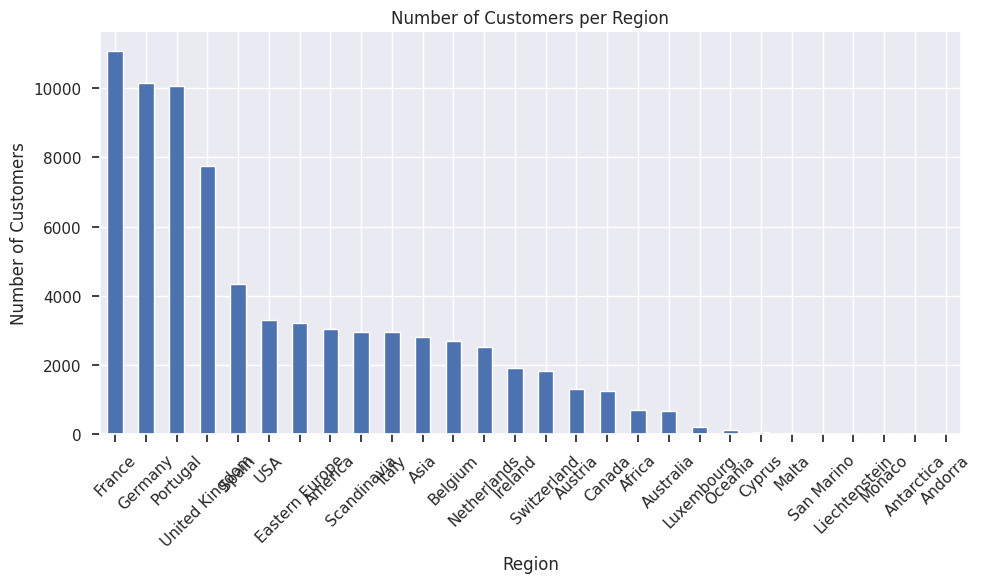

In [361]:
# Count the number of customers per continent

continent_count = df['Region'].value_counts()



# Plot

plt.figure(figsize=(10, 6))

continent_count.plot(kind='bar')

plt.title('Number of Customers per Region')

plt.xlabel('Region')

plt.ylabel('Number of Customers')

plt.xticks(rotation=45)

plt.tight_layout()

plt.show() # Considering that Europe has by far the biggest amount of customers, We are only specifying their countries. The rest will be only the customers continent

In [362]:
# List of countries to rename in feature region due to few amount of data
countries_to_rename = {'Luxembourg':'Western Europe','Cyprus': 'Eastern Europe', 'Malta':'Western Europe',
                     'Liechtenstein': 'Western Europe', 'Andorra': 'Western Europe', 'San Marino': 'Western Europe',
                       'Monaco': 'Western Europe'}


df['Region'] = df['Region'].map(countries_to_rename).fillna(df['Region'])

In [363]:
df[df['Region']=='Western Europe']

Nationality  Age  DaysSinceCreation  AverageLeadTime  LodgingRevenue  \
1623           LUX   58               1333              4.0          188.40   
3562           LUX   45               1295             36.0          113.04   
3815           LUX   41               1290             77.0          903.60   
4241           LUX   27               1283              2.0          208.00   
6325           LUX   46               1245            129.0          289.00   
...            ...  ...                ...              ...             ...   
106782         LUX   38                 43             84.0          446.25   
106806         LUX   29                 43             85.0          384.75   
107122         LUX   44                 41             57.0          295.36   
107495         LUX   48                 38              5.0          189.00   
107610         MLT   42                 37             17.0          326.00   

        OtherRevenue  BookingsCanceled  BookingsNoShowed  BookingsCheckedIn  \
1623           32.60                 0                 0                  1   
3562          200.46                 0                 0                  1   
3815          476.80                 0                 0                  1   
4241           80.50                 0                 0                  1   
6325          156.00                 0                 0                  1   
...              ...               ...               ...                ...   
106782         12.00                 0                 0                  1   
106806         18.00                 0                 0                  1   
107122        169.50                 0                 0                  1   
107495         24.00                 0                 0                  1   
107610         41.00                 0                 0                  1   

        PersonsNights  RoomNights    DistributionChannel  SRHighFloor  \
1623                6           3  Travel Agent/Operator            0   
3562                4           2  Travel Agent/Operator            0   
3815               24           6                 Direct            0   
4241                4           2  Travel Agent/Operator            0   
6325                8           4  Travel Agent/Operator            0   
...               ...         ...                    ...          ...   
106782              9           3                 Direct            0   
106806              9           3                 Direct            0   
107122              6           3  Travel Agent/Operator            0   
107495              3           1  Travel Agent/Operator            0   
107610              2           2  Travel Agent/Operator            0   

        SRLowFloor  SRAccessibleRoom  SRMediumFloor  SRBathtub  SRShower  \
1623             0                 0              0          0         0   
3562             0                 0              0          0         0   
3815             0                 0              0          0         0   
4241             0                 0              0          0         0   
6325             0                 0              0          0         0   
...            ...               ...            ...        ...       ...   
106782           0                 0              0          0         0   
106806           0                 0              0          0         0   
107122           0                 0              0          0         0   
107495           0                 0              0          0         0   
107610           0                 0              0          0         0   

        SRCrib  SRKingSizeBed  SRTwinBed  SRNearElevator  SRAwayFromElevator  \
1623         0              0          0               0                   0   
3562         0              0          0               0                   0   
3815         0              0          0               0                   0   

In [364]:
df[df['Region'].isnull()]

Empty DataFrame
Columns: [Nationality, Age, DaysSinceCreation, AverageLeadTime, LodgingRevenue, OtherRevenue, BookingsCanceled, BookingsNoShowed, BookingsCheckedIn, PersonsNights, RoomNights, DistributionChannel, SRHighFloor, SRLowFloor, SRAccessibleRoom, SRMediumFloor, SRBathtub, SRShower, SRCrib, SRKingSizeBed, SRTwinBed, SRNearElevator, SRAwayFromElevator, SRNoAlcoholInMiniBar, SRQuietRoom, Foreigner, Region]
Index: []

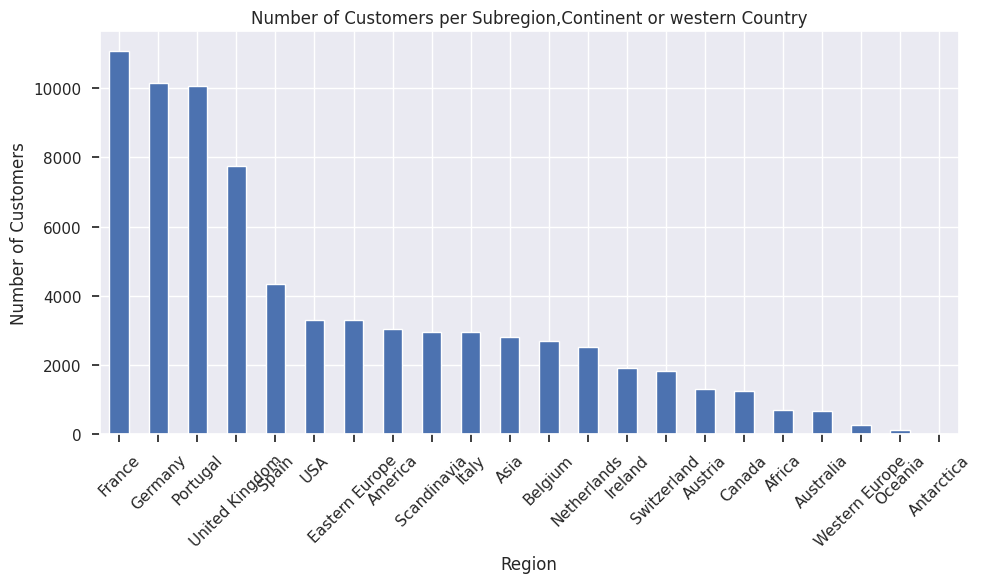

In [365]:
# Count the number of customers per continent

continent_count = df['Region'].value_counts()



# Plot

plt.figure(figsize=(10, 6))

continent_count.plot(kind='bar')

plt.title('Number of Customers per Subregion,Continent or western Country')

plt.xlabel('Region')

plt.ylabel('Number of Customers')

plt.xticks(rotation=45)

plt.tight_layout()

plt.show() # Considering that Europe has by far the biggest amount of customers, We are only specifying their countries. The rest will be only the customers continent

In [366]:
#Remove the feature Nationality from our dataset
df.drop(columns=['Nationality'], inplace=True)
non_metric_features.remove("Nationality")

<h2>3.5 Some Data Visualization  </h2>

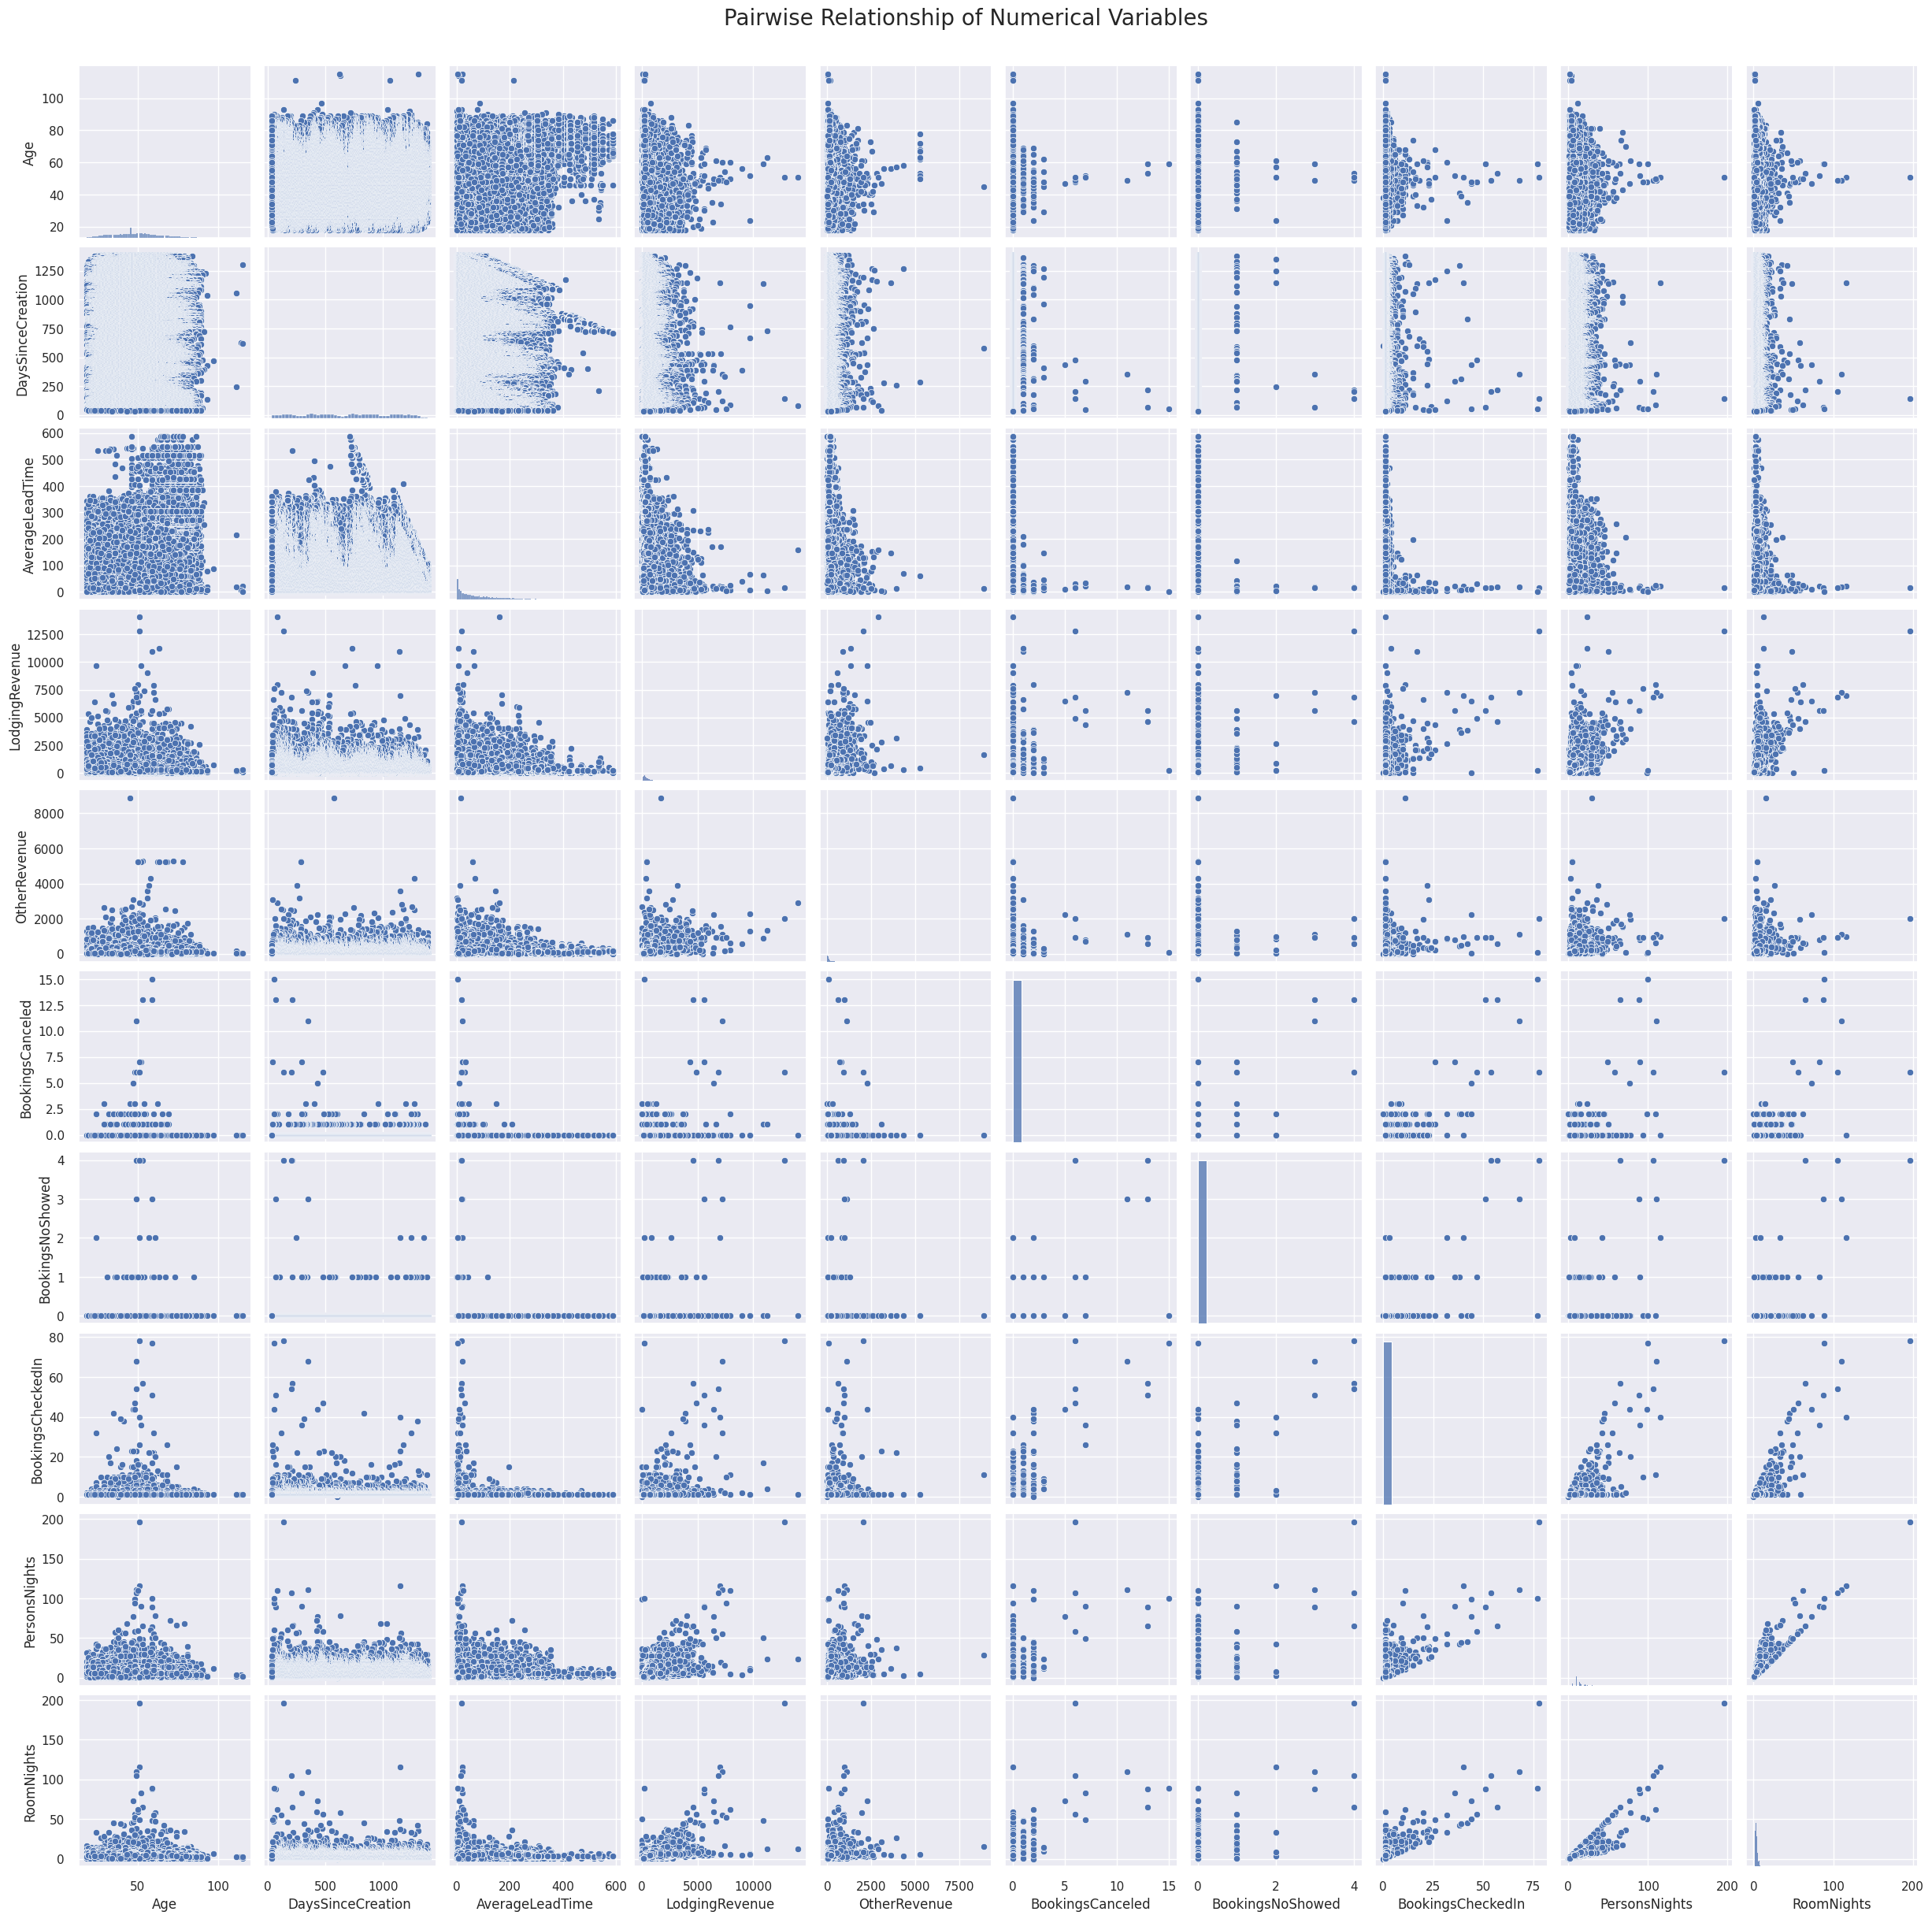

In [367]:
#Voltar para cá!!!
# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(df[metric_features], diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

if not os.path.exists(os.path.join('..', 'figures', 'exp_analysis')):
    # if the exp_analysis directory is not present then create it first
    os.makedirs(os.path.join('..', 'figures', 'exp_analysis'))

plt.savefig(os.path.join('..', 'figures', 'exp_analysis', 'pairwise_relationship_of_numerical_variables.png'), dpi=200)
plt.show()

In [368]:
# Plotting Histogram and Boxplot for numerical features.

def visualize_numerical(data):

    ''' Visualizes the numerical features with a boxplot and histogram.

    # Arguments:
    dataset, pd DataFrame: input dataframe
    target, pd Series: target variable for hue colouring

    # Results:
    Shows the boxplot and histogram.

    '''

    figure, axis = plt.subplots(1, 2, figsize=(10, 3))

    sns.boxplot(ax= axis[0], x=data, dodge=False)
    axis[0].set_title(f"Boxplot of {data.name}", fontdict= {"fontsize": 14})

    sns.histplot(ax= axis[1], x=data, kde=False)
    axis[1].set_title(f"Histogram of {data.name}", fontdict= {"fontsize": 14})

    plt.show()

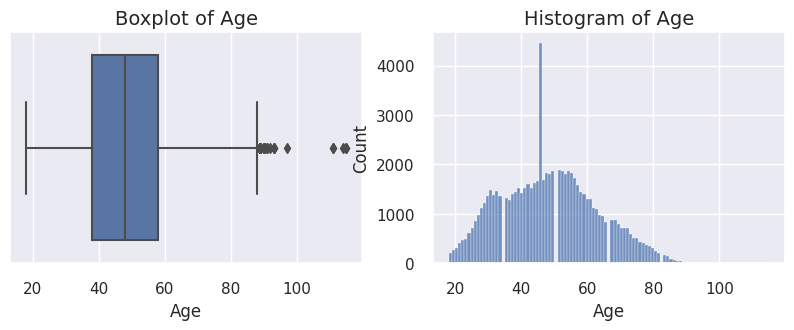

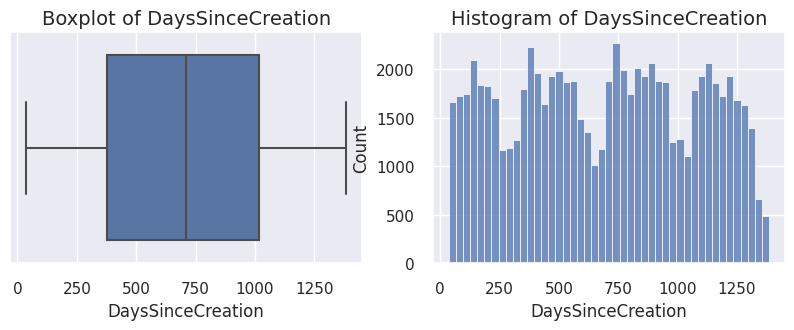

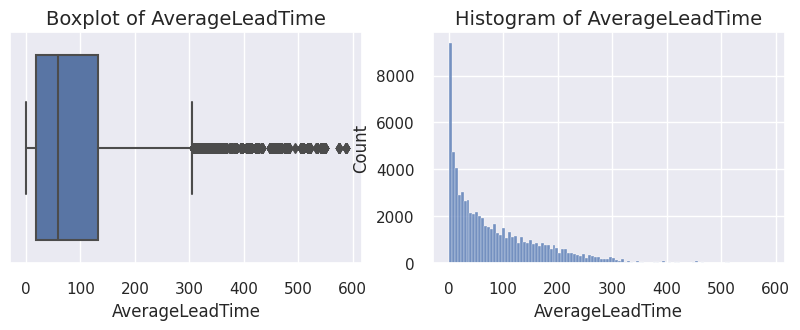

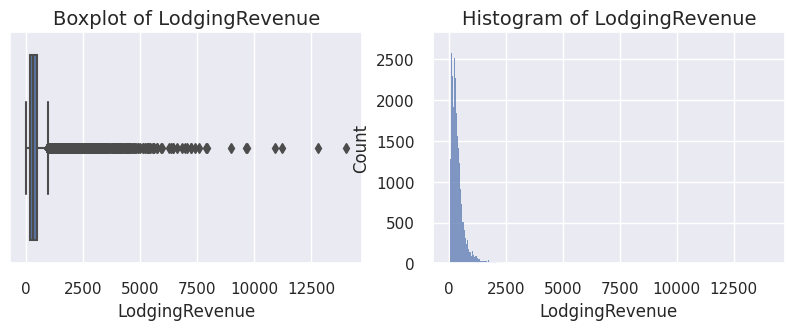

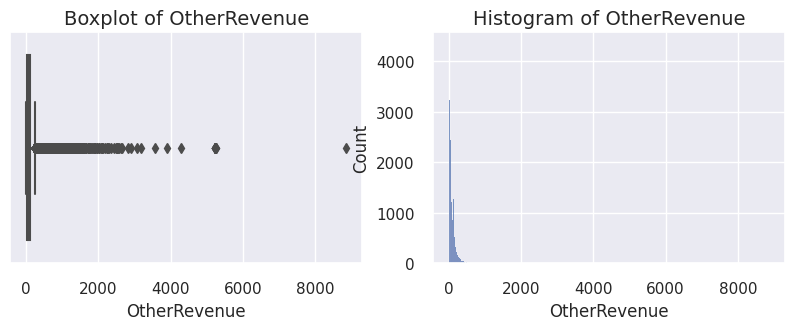

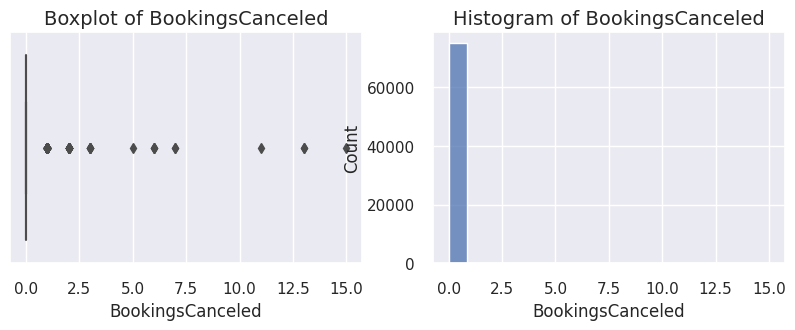

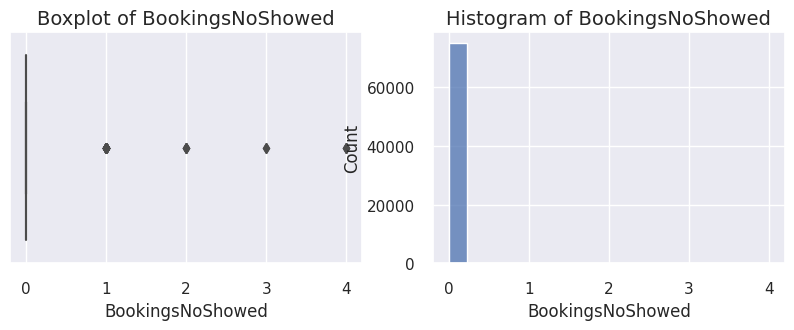

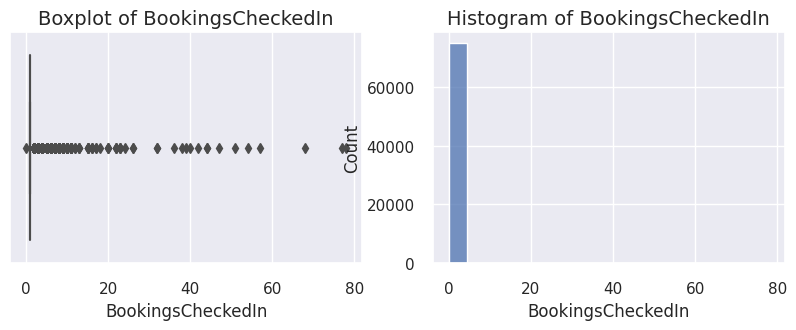

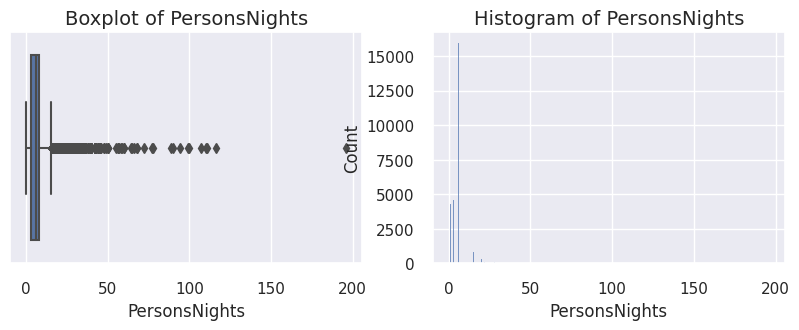

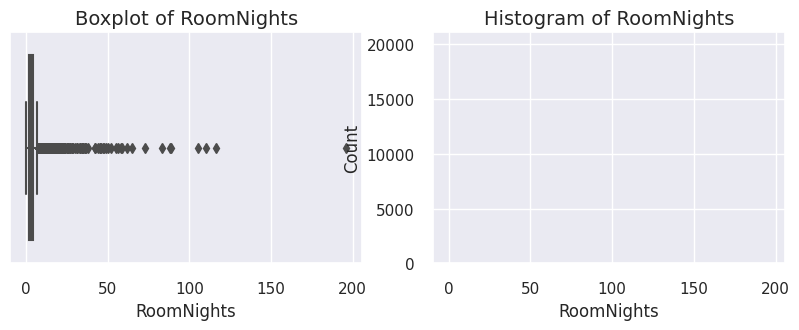

In [369]:
for feature in metric_features:
    visualize_numerical(df[feature])

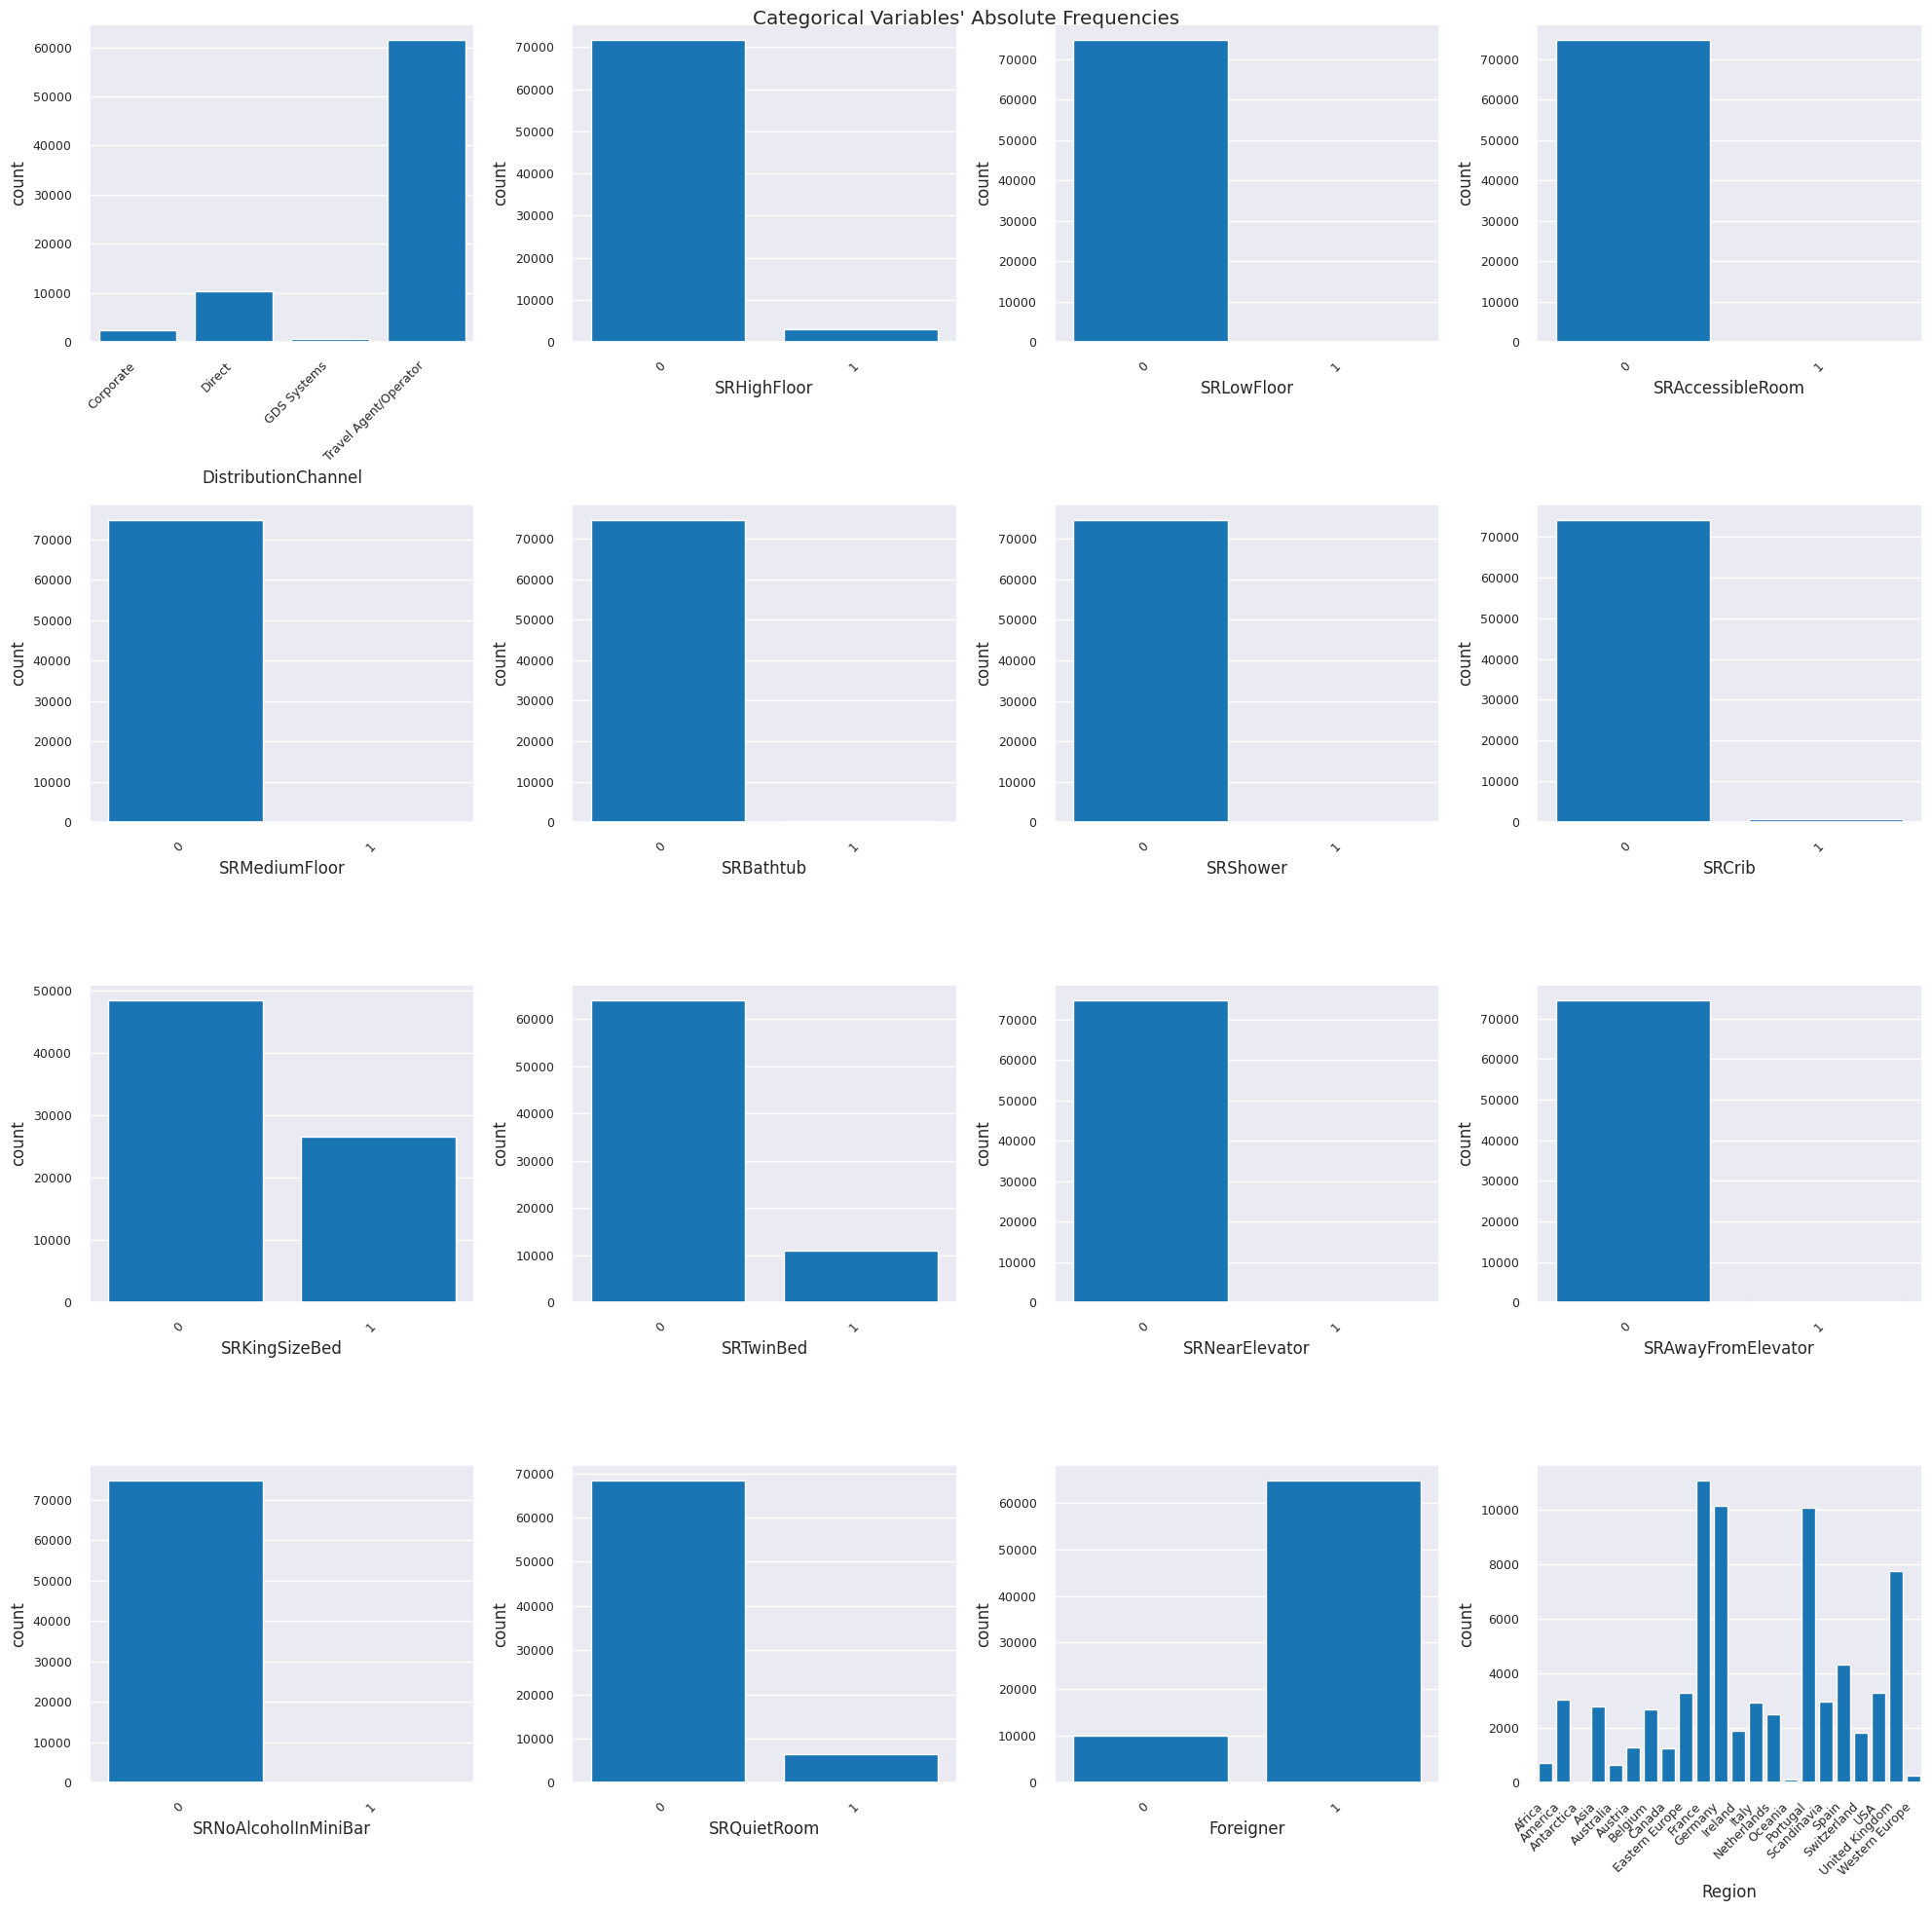

In [370]:

# All Non-Metric Variables' Absolute Frequencies
sns.set()

# Prepare figure. Create individual axes where each bar plot will be placed
fig, axes = plt.subplots(4, ceil(len(non_metric_features) / 4), figsize=(20, 20))

# Plot data
# Iterate across axes objects and associate each bar plot:
for ax, feat in zip(axes.flatten(), non_metric_features):
    order = df[feat].value_counts().sort_index().index
    sns.countplot(x=df[feat].astype(object), ax=ax, color='#007acc', order=order)
    ax.tick_params(axis='x', labelsize=9)
    ax.tick_params(axis='y', labelsize=9)

    # Rotate x-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

title = "Categorical Variables' Absolute Frequencies"
plt.suptitle(title)
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


locator: <matplotlib.ticker.FixedLocator object at 0x7d9f109738b0>


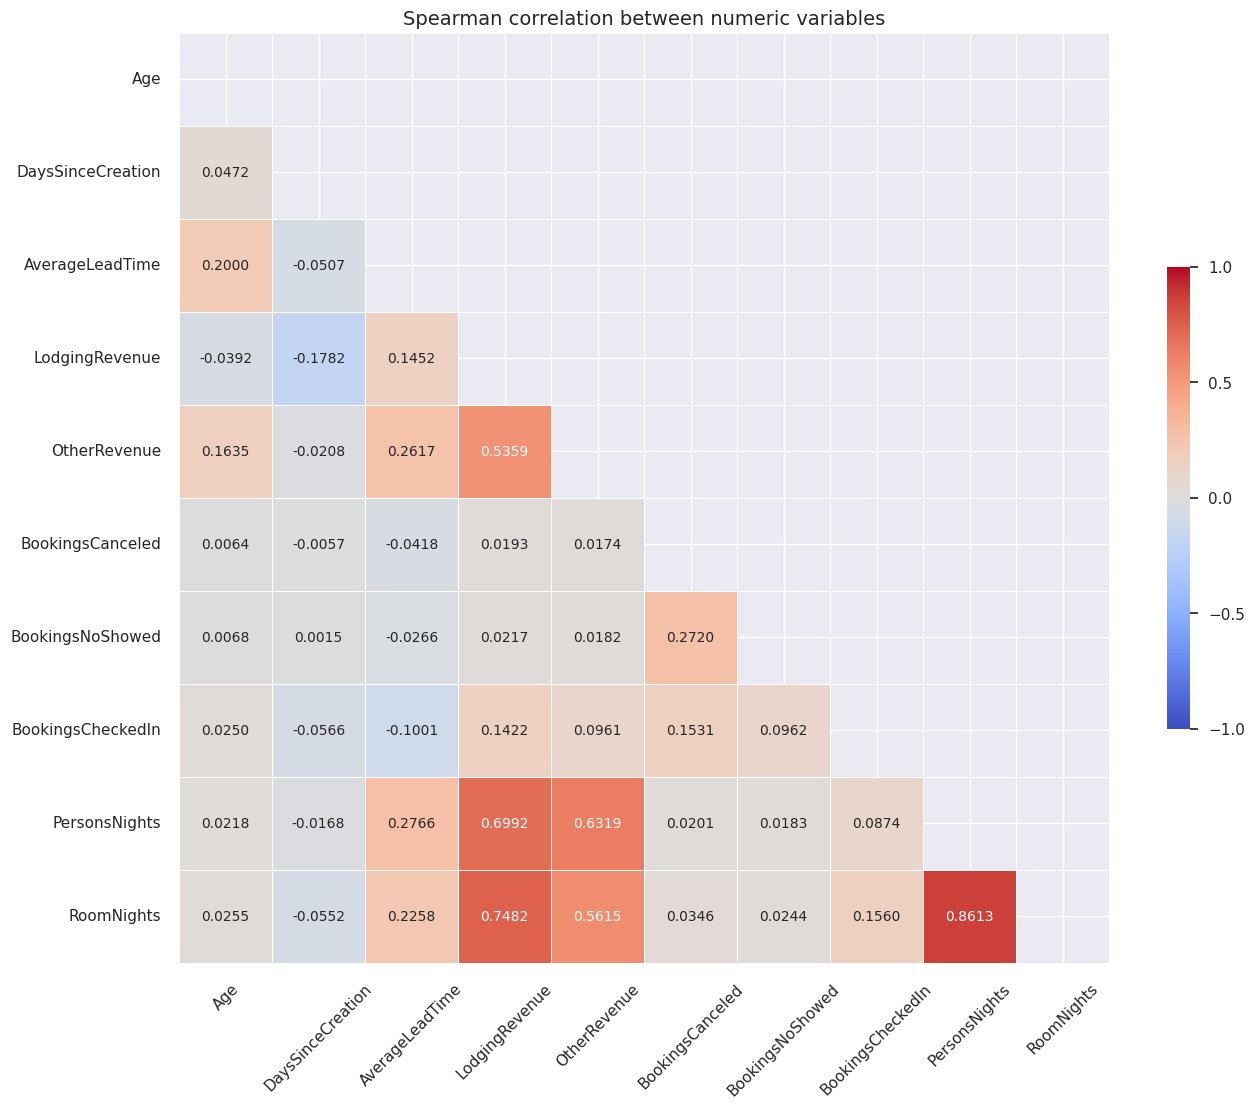

In [371]:
# Create correlation matrix
corr = df[metric_features].corr(method='spearman')
mask = np.zeros_like(corr, dtype=bool) #dtype=np.bool_
mask[np.triu_indices_from(mask)]= True

# Draw
fig , ax = plt.subplots(figsize=(15, 15))
heatmap = sns.heatmap(corr,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      fmt='.4f',
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 10})

# Decoration
plt.title("Spearman correlation between numeric variables", fontsize=14)
ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns, rotation = 45)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

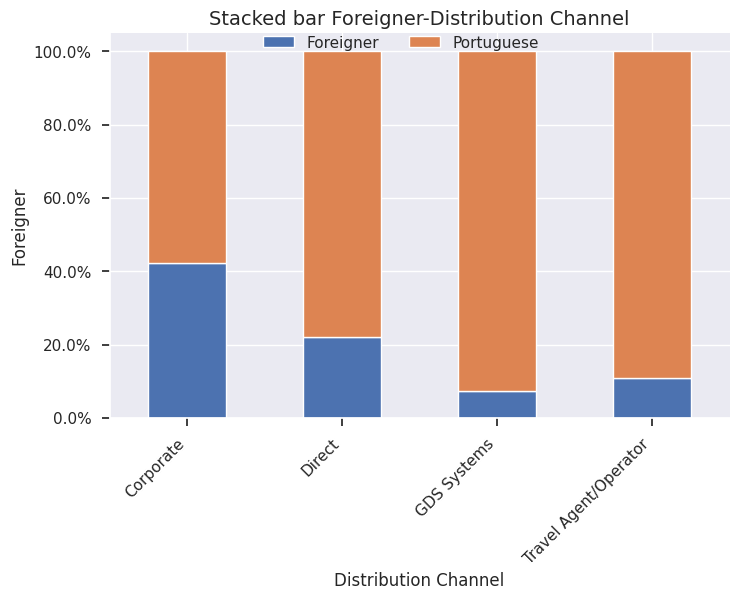

In [372]:
# STACKED BAR PLOT - DISTRIBUTION

# Aggregate and sort
tempDF = df.pivot_table(values=['Age'],
                      index='DistributionChannel',
                      columns='Foreigner',
                      aggfunc='count',
                      fill_value=0)
tempDF = tempDF.div(tempDF.sum(1), axis=0)

# Draw
fig, ax = plt.subplots(figsize=(8,5))
g = tempDF.plot(kind='bar', stacked=True, ax=ax)

# Decoration
vals = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(ticker.FixedLocator(vals))
ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])
sns.despine()
plt.title("Stacked bar Foreigner-Distribution Channel", fontsize=14)
plt.xlabel("Distribution Channel")
plt.ylabel("Foreigner")
plt.xticks(rotation=45, ha='right')
plt.rc('axes', labelsize=10)
handles, labels = ax.get_legend_handles_labels()
labels = ['Foreigner', 'Portuguese']
ax.legend(handles=handles, labels=labels, loc='upper center',
          ncol=4, bbox_to_anchor=(0.47, 1.03), frameon=False)

In [373]:
# Checking frequency of every value for each categorical feature

for feature in non_metric_features:
    print(f"Feature: {feature}")
    print(df[feature].value_counts())
    print()


Feature: DistributionChannel
Travel Agent/Operator    61595
Direct                   10355
Corporate                 2358
GDS Systems                597
Name: DistributionChannel, dtype: int64

Feature: SRHighFloor
0    71815
1     3090
Name: SRHighFloor, dtype: int64

Feature: SRLowFloor
0    74816
1       89
Name: SRLowFloor, dtype: int64

Feature: SRAccessibleRoom
0    74887
1       18
Name: SRAccessibleRoom, dtype: int64

Feature: SRMediumFloor
0    74852
1       53
Name: SRMediumFloor, dtype: int64

Feature: SRBathtub
0    74684
1      221
Name: SRBathtub, dtype: int64

Feature: SRShower
0    74785
1      120
Name: SRShower, dtype: int64

Feature: SRCrib
0    74135
1      770
Name: SRCrib, dtype: int64

Feature: SRKingSizeBed
0    48433
1    26472
Name: SRKingSizeBed, dtype: int64

Feature: SRTwinBed
0    64039
1    10866
Name: SRTwinBed, dtype: int64

Feature: SRNearElevator
0    74879
1       26
Name: SRNearElevator, dtype: int64

Feature: SRAwayFromElevator
0    74627
1      27

In [374]:
variances = df[metric_features].var()
variances

Age                     210.729002
DaysSinceCreation    142579.563502
AverageLeadTime        8108.989876
LodgingRevenue       162387.960346
OtherRevenue          19710.205491
BookingsCanceled          0.015169
BookingsNoShowed          0.001575
BookingsCheckedIn         0.802586
PersonsNights            21.381759
RoomNights                5.548343
dtype: float64

<h2>3.6 Outlier Handling </h2>

#### 1. Approach - Z-Scores

In [375]:
# Calculate Z-scores for all numeric features
z_scores = df[metric_features].apply(lambda x: (x - x.mean()) / x.std())

# Remove outliers based on Z-scores (e.g., keep data within 3 standard deviations)
df_zs = df[(z_scores.abs() < 3).all(axis=1)]

# Calculate the percentage of data removed
percentage_removed = ((len(df) - len(df_zs)) / len(df)) * 100

print(f"Percentage of data which would be removed: {percentage_removed:.2f}%")

Percentage of data which would be removed: 5.41%


#### 2. Approach - IQR

In [376]:
def IQR_outlier(df, feature):
    df_old = df
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)

    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[feature] > lower_bound) & (df[feature] < upper_bound)]

    # Calculate the percentage of data removed
    percentage_removed = ((len(df_old) - len(df)) / len(df_old)) * 100
    print(f"Percentage of data which would be removed: {feature}:  {percentage_removed:.2f}%")

    return df

In [377]:
df_IQR = df.copy()

for feature in metric_features:
    try:
        df_IQR = IQR_outlier(df_IQR, feature)
    except ZeroDivisionError:
        print()
        print('All data has been removed.')
        break

Percentage of data which would be removed: Age:  0.12%
Percentage of data which would be removed: DaysSinceCreation:  0.00%
Percentage of data which would be removed: AverageLeadTime:  2.58%
Percentage of data which would be removed: LodgingRevenue:  6.28%
Percentage of data which would be removed: OtherRevenue:  6.00%
Percentage of data which would be removed: BookingsCanceled:  100.00%

All data has been removed.


#### 3. Approach - Manual Outlier Handling

In [378]:
# copy original dataframe
df_out = df.copy()

In [379]:
filters_1 = (
     (df_out['Age'] <= 100)
     &
    (df_out['LodgingRevenue'] <= 5000)
     &
    (df_out['OtherRevenue'] <= 1500)
     &
    (df_out['BookingsCheckedIn'] <= 18)
     &
    (df_out['RoomNights'] <= 24)
     &
    (df_out['PersonsNights'] <= 43)
     &
    (df_out['BookingsCanceled'] <= 5)
)

df_out = df_out[filters_1]

In [380]:
# Calculate the percentage of data removed
percentage_removed = ((len(df) - len(df_out)) / len(df)) * 100

print(f"Percentage of data which would be removed: {percentage_removed:.2f}%")

Percentage of data which would be removed: 0.21%


#### 4. Adapted Winsorize

In [381]:
df_winsorize=df.copy()

#Tresholds chosen using the previous histogram and boxplot as references, as well as some common sense

df_winsorize['AverageLeadTime'][df_winsorize['AverageLeadTime'] > 365] = 365

#The other features will be adressed using feature engineering


In [382]:
df = df_winsorize

<h2>3.7 Feature Engineering </h2>

<h4> Age Category </h4>
__________________________________________________________

In [383]:
# Create a new column 'AgeCategory'
df['AgeCategory'] = pd.cut(x=df['Age'], bins=[17, 29, 39, 49, 59, 69,120], labels=['18-29','30-39','40-49','50-59','60-69','>=70'])

# drop age column
df.drop('Age', axis=1, inplace=True)
#Add AgeCategory to non metric features
non_metric_features.append("AgeCategory")

In [384]:
df[df['AgeCategory'].isnull()]

Empty DataFrame
Columns: [DaysSinceCreation, AverageLeadTime, LodgingRevenue, OtherRevenue, BookingsCanceled, BookingsNoShowed, BookingsCheckedIn, PersonsNights, RoomNights, DistributionChannel, SRHighFloor, SRLowFloor, SRAccessibleRoom, SRMediumFloor, SRBathtub, SRShower, SRCrib, SRKingSizeBed, SRTwinBed, SRNearElevator, SRAwayFromElevator, SRNoAlcoholInMiniBar, SRQuietRoom, Foreigner, Region, AgeCategory]
Index: []

<h4> Total Revenue </h4>
__________________________________________________________

In [385]:
#This new feature will substitute lodging revenue
df["TotalRevenue"] = df["LodgingRevenue"] + df["OtherRevenue"]
metric_features.append("TotalRevenue")
df.drop('LodgingRevenue', axis=1, inplace=True)

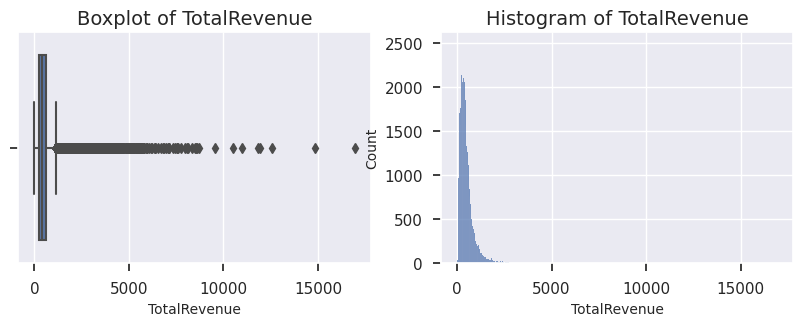

In [386]:
visualize_numerical(df['TotalRevenue'])

<h4> Premium Service Rate </h4>
__________________________________________________________

In [387]:
#This will substitute OtherRevenue allowing us to deal with outliers problem as it is a rate
df['PremiumServiceRate'] = np.where(df['TotalRevenue'] == 0, 0, round(df['OtherRevenue']/df['TotalRevenue'] , 2))
metric_features.append("PremiumServiceRate")
df.drop('OtherRevenue',axis=1, inplace=True)

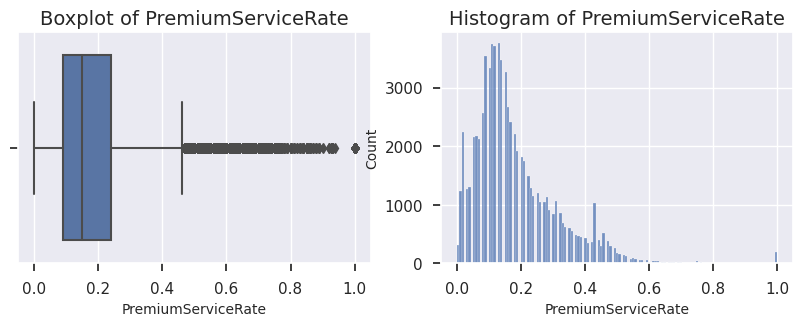

In [388]:
visualize_numerical(df['PremiumServiceRate'])

In [389]:
#Outlier Handling with adapted winsorize
df['TotalRevenue'][df['TotalRevenue'] > 5000] = 5000

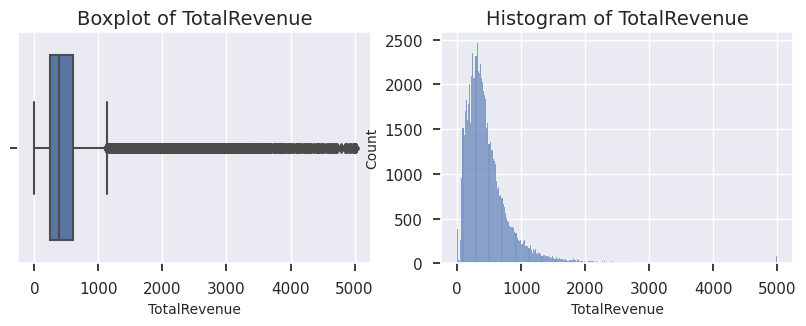

In [390]:
visualize_numerical(df['TotalRevenue'])

<h4> Booking Success Rate </h4>
__________________________________________________________

In [391]:
#keep bookings information in one single feature
#This also allows us to deal with the outliers
df['BookingSuccessRate'] = round(df['BookingsCheckedIn'] / (df['BookingsCheckedIn'] + df['BookingsCanceled'] + df['BookingsNoShowed']), 2)
metric_features.append("BookingSuccessRate")
df.drop('BookingsCheckedIn',axis=1, inplace=True)
df.drop('BookingsCanceled',axis=1, inplace=True)
df.drop('BookingsNoShowed',axis=1, inplace=True)

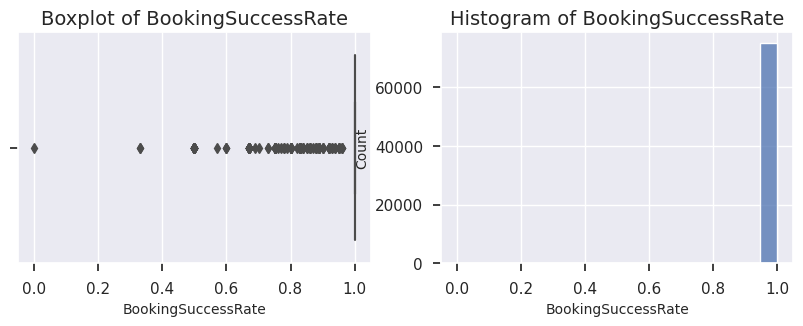

In [392]:
visualize_numerical(df['BookingSuccessRate'])

<h4> Preferred Room Location </h4>
__________________________________________________________

In [393]:
#Resuming the rooms/floors preferences in one single feature
df['PreferredRoomLocation'] = df.apply(lambda row:
    "No Preference" if row['SRAccessibleRoom'] == 0 and row['SRLowFloor'] == 0 and row['SRMediumFloor'] == 0 and row['SRHighFloor'] == 0 else
    "Accessible Room" if row['SRAccessibleRoom'] == 1 and row['SRLowFloor'] == 0 and row['SRMediumFloor'] == 0 and row['SRHighFloor'] == 0 else
    "Low Floor" if row['SRAccessibleRoom'] == 0 and row['SRLowFloor'] == 1 and row['SRMediumFloor'] == 0 and row['SRHighFloor'] == 0 else
    "Medium Floor" if row['SRAccessibleRoom'] == 0 and row['SRLowFloor'] == 0 and row['SRMediumFloor'] == 1 and row['SRHighFloor'] == 0 else
    "High Floor" if row['SRAccessibleRoom'] == 0 and row['SRLowFloor'] == 0 and row['SRMediumFloor'] == 0 and row['SRHighFloor'] == 1 else
    None, axis=1)
non_metric_features.append("PreferredRoomLocation")
columns_to_drop = ['SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor']
non_metric_features = [column for column in non_metric_features if column not in columns_to_drop]
df.drop(columns=columns_to_drop, inplace=True)

In [394]:
df['PreferredRoomLocation'].value_counts()

No Preference      71655
High Floor          3090
Low Floor             89
Medium Floor          53
Accessible Room       18
Name: PreferredRoomLocation, dtype: int64

<h4> Preferred Bed Type </h4>
__________________________________________________________

In [395]:
#Resuming the bed preferences in one single feature
# Use lambda function with apply method to calculate PreferredBedType
df['PreferredBedType'] = df.apply(lambda row:
    "No Preference"  if row['SRKingSizeBed'] == 0 and row['SRTwinBed'] == 0 and row['SRCrib'] == 0 else
    "King Size Bed" if row['SRKingSizeBed'] == 1 and row['SRTwinBed'] == 0 and row['SRCrib'] == 0 else
    "Twin Bed" if row['SRKingSizeBed'] == 0 and row['SRTwinBed'] == 1 and row['SRCrib'] == 0 else
    "Crib" if row['SRKingSizeBed'] == 0 and row['SRTwinBed'] == 0 and row['SRCrib'] == 1 else
    "KingSize Bed And Crib" if row['SRKingSizeBed'] == 1 and row['SRTwinBed'] == 0 and row['SRCrib'] == 1 else
    "Twin Bed And Crib" if row['SRKingSizeBed'] == 0 and row['SRTwinBed'] == 1 and row['SRCrib'] == 1 else
    None, axis=1)

# Append the new feature to metric_features
non_metric_features.append("PreferredBedType")

# Drop the original columns
columns_to_drop = ['SRKingSizeBed', 'SRTwinBed', 'SRCrib']
non_metric_features = [column for column in non_metric_features if column not in columns_to_drop]
df.drop(columns=columns_to_drop, inplace=True)


<h4> Preferred Bathroom Type </h4>
__________________________________________________________

In [396]:
##Resuming the bathroom preferences in one single feature
df['PreferredBathroomType'] = df.apply(lambda row:
    "No Preference" if row['SRBathtub'] == 0 and row['SRShower'] == 0  else
    "Bathtub" if row['SRBathtub'] == 1 and row['SRShower'] == 0  else
    "Shower" if row['SRBathtub'] == 0 and row['SRShower'] == 1  else
    None, axis=1)
non_metric_features.append("PreferredBathroomType")
columns_to_drop = ['SRBathtub', 'SRShower']
non_metric_features = [column for column in non_metric_features if column not in columns_to_drop]
df.drop(columns=columns_to_drop, inplace=True)

<h4> Preferred Elevator Proximity </h4>
__________________________________________________________

In [397]:
#Resuming the elevator proximity preferences in one single feature
df['PreferredElevatorProximity'] = df.apply(lambda row:
    "No Preference" if row['SRNearElevator'] == 0 and row['SRAwayFromElevator'] == 0  else
    "NearElevator" if row['SRNearElevator'] == 1 and row['SRAwayFromElevator'] == 0  else
    "AwayFromElevator" if row['SRNearElevator'] == 0 and row['SRAwayFromElevator'] == 1  else
    None, axis=1)
non_metric_features.append("PreferredElevatorProximity")
columns_to_drop = ['SRNearElevator', 'SRAwayFromElevator']
non_metric_features = [column for column in non_metric_features if column not in columns_to_drop]
df.drop(columns=columns_to_drop, inplace=True)

<h4> Quietness and Alcohol Preferences </h4>
__________________________________________________________

In [398]:
#Resuming the quietness and alcohol preferences in one single feature
df['QuietnessAndAlcoholPreferences'] = df.apply(lambda row:
    "No Preference" if row['SRNoAlcoholInMiniBar'] == 0 and row['SRQuietRoom'] == 0 else
    "No Alcohol In MiniBar" if row['SRNoAlcoholInMiniBar'] == 1 and row['SRQuietRoom'] == 0 else
    "Quiet Room" if row['SRNoAlcoholInMiniBar'] == 0 and row['SRQuietRoom'] == 1 else
    "Quiet Room And No Alcohol In MiniBar ", axis=1)

# Append the new feature to metric_features
non_metric_features.append("QuietnessAndAlcoholPreferences")

# Drop the original columns
columns_to_drop = ['SRNoAlcoholInMiniBar', 'SRQuietRoom']
non_metric_features = [column for column in non_metric_features if column not in columns_to_drop]
df.drop(columns=columns_to_drop, inplace=True)

<h4> Selective Customer </h4>
__________________________________________________________

In [399]:
# Define a function to determine the picky level of a customer based on their preferences
def determine_selective_level(row):
    # Count the number of preferences the customer has
    preferences_count = sum([
        1 if row[attr] != "No Preference" else 0
        for attr in ['PreferredRoomLocation', 'PreferredBedType', 'PreferredBathroomType', 'PreferredElevatorProximity', 'QuietnessAndAlcoholPreferences']
    ])
    # Determine the picky level based on the number of preferences
    if preferences_count == 0:
        return "Not Selective"  # Customer has no specific preferences
    elif preferences_count <= 2:
        return "Sometimes Selective"  # Customer has preferences for 1 to 2 attributes
    else:
        return "Very SeLective"  # Customer has preferences for 3 to 5 attributes

# Apply the function to each row of the DataFrame to create the 'PickyCustomer' feature
df['SelectiveCustomer'] = df.apply(determine_selective_level, axis=1)

# Append the new feature to non_metric_features list
non_metric_features.append("SelectiveCustomer")

In [400]:
df['SelectiveCustomer'].value_counts()

Sometimes Selective    39886
Not Selective          34456
Very SeLective           563
Name: SelectiveCustomer, dtype: int64

<h4> Average number of person per room </h4>
__________________________________________________________

In [401]:
df['AveragePersonRoom'] = np.where(df['PersonsNights'] == 0, 0, round(df['PersonsNights'] / df['RoomNights'] , 0))

metric_features.append("AveragePersonRoom")

In [402]:
#The average person per room will substitute the personnights and roomnights as they are higly correlated features
#it will also help dealing with the outliers
df.drop('PersonsNights', axis=1, inplace=True)
df.drop('RoomNights', axis=1, inplace=True)

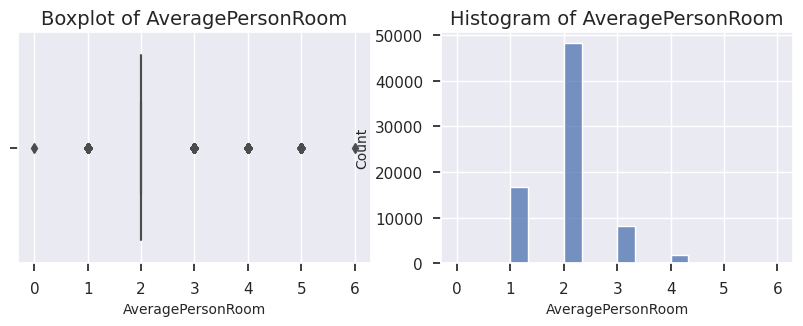

In [403]:
visualize_numerical(df['AveragePersonRoom'])

In [404]:
df[df['AveragePersonRoom'].isnull()]

Empty DataFrame
Columns: [DaysSinceCreation, AverageLeadTime, DistributionChannel, Foreigner, Region, AgeCategory, TotalRevenue, PremiumServiceRate, BookingSuccessRate, PreferredRoomLocation, PreferredBedType, PreferredBathroomType, PreferredElevatorProximity, QuietnessAndAlcoholPreferences, SelectiveCustomer, AveragePersonRoom]
Index: []

<h2>3.8 Data Transformation </h2>

<h3>3.8.1 Data Encoding </h3>

In [405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74905 entries, 0 to 107630
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   DaysSinceCreation               74905 non-null  int64   
 1   AverageLeadTime                 74905 non-null  float64 
 2   DistributionChannel             74905 non-null  object  
 3   Foreigner                       74905 non-null  int64   
 4   Region                          74905 non-null  object  
 5   AgeCategory                     74905 non-null  category
 6   TotalRevenue                    74905 non-null  float64 
 7   PremiumServiceRate              74905 non-null  float64 
 8   BookingSuccessRate              74905 non-null  float64 
 9   PreferredRoomLocation           74905 non-null  object  
 10  PreferredBedType                74905 non-null  object  
 11  PreferredBathroomType           74905 non-null  object  
 12  PreferredElevator

In [406]:
print(metric_features)
print(non_metric_features)

['Age', 'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights', 'TotalRevenue', 'PremiumServiceRate', 'BookingSuccessRate', 'AveragePersonRoom']
['DistributionChannel', 'Foreigner', 'Region', 'AgeCategory', 'PreferredRoomLocation', 'PreferredBedType', 'PreferredBathroomType', 'PreferredElevatorProximity', 'QuietnessAndAlcoholPreferences', 'SelectiveCustomer']


In [407]:
metric_features.remove('Age')
metric_features.remove('LodgingRevenue')
metric_features.remove('OtherRevenue')
metric_features.remove('BookingsCanceled')
metric_features.remove('BookingsNoShowed')
metric_features.remove('BookingsCheckedIn')
metric_features.remove('PersonsNights')
metric_features.remove('RoomNights')

<h4> One Hot Encoding </h4>
__________________________________________________________

In [408]:
# Specify the columns you want to one-hot encode
cols = ['DistributionChannel','PreferredRoomLocation', 'PreferredBedType', 'PreferredBathroomType','PreferredElevatorProximity','QuietnessAndAlcoholPreferences','Region','AgeCategory','SelectiveCustomer']

# One-hot encode the specified columns
df = ce.OneHotEncoder(cols=cols, use_cat_names=True).fit_transform(df)

In [409]:
pd.set_option('display.max_columns', None)
df

DaysSinceCreation  AverageLeadTime  DistributionChannel_Corporate  \
0                     440             59.0                              1   
1                    1385             61.0                              0   
3                    1385             93.0                              0   
5                    1385             58.0                              0   
7                    1385             38.0                              0   
...                   ...              ...                            ...   
107623                 37             43.0                              0   
107625                 37              7.0                              0   
107626                 36             41.0                              0   
107628                 36            170.0                              0   
107630                 36             66.0                              0   

        DistributionChannel_Travel Agent/Operator  DistributionChannel_Direct  \
0                                               0                           0   
1                                               1                           0   
3                                               1                           0   
5                                               1                           0   
7                                               1                           0   
...                                           ...                         ...   
107623                                          1                           0   
107625                                          0                           1   
107626                                          1                           0   
107628                                          1                           0   
107630                                          1                           0   

        DistributionChannel_GDS Systems  Foreigner  Region_Portugal  \
0                                     0          0                1   
1                                     0          0                1   
3                                     0          1                0   
5                                     0          1                0   
7                                     0          1                0   
...                                 ...        ...              ...   
107623                                0          1                0   
107625                                0          0                1   
107626                                0          1                0   
107628                                0          1                0   
107630                                0          1                0   

        Region_France  Region_Asia  Region_Ireland  Region_Spain  \
0                   0            0               0             0   
1                   0            0               0             0   
3                   1            0               0             0   
5                   0            1               0             0   
7                   1            0               0             0   
...               ...          ...             ...           ...   
107623              0            0               0             1   
107625              0            0               0             0   
107626              0            0               0             0   
107628              0            0               0             0   
107630              0            0               0             0   

        Region_Belgium  Region_Austria  Region_Germany  Region_Italy  \
0                    0               0               0             0   
1                    0               0               0             0   
3                    0               0               0             0   
5                    0               0               0             0   
7                    0               0               0             0   
...     

<h3>3.8.2 Data Scaling </h3>

In [410]:
print(metric_features)
print(non_metric_features)

['DaysSinceCreation', 'AverageLeadTime', 'TotalRevenue', 'PremiumServiceRate', 'BookingSuccessRate', 'AveragePersonRoom']
['DistributionChannel', 'Foreigner', 'Region', 'AgeCategory', 'PreferredRoomLocation', 'PreferredBedType', 'PreferredBathroomType', 'PreferredElevatorProximity', 'QuietnessAndAlcoholPreferences', 'SelectiveCustomer']


In [411]:
non_metric_features=df.columns.drop(metric_features).tolist()
non_metric_features

['DistributionChannel_Corporate',
 'DistributionChannel_Travel Agent/Operator',
 'DistributionChannel_Direct',
 'DistributionChannel_GDS Systems',
 'Foreigner',
 'Region_Portugal',
 'Region_France',
 'Region_Asia',
 'Region_Ireland',
 'Region_Spain',
 'Region_Belgium',
 'Region_Austria',
 'Region_Germany',
 'Region_Italy',
 'Region_Eastern Europe',
 'Region_USA',
 'Region_America',
 'Region_Switzerland',
 'Region_United Kingdom',
 'Region_Scandinavia',
 'Region_Africa',
 'Region_Netherlands',
 'Region_Canada',
 'Region_Australia',
 'Region_Western Europe',
 'Region_Oceania',
 'Region_Antarctica',
 'AgeCategory_18-29',
 'AgeCategory_30-39',
 'AgeCategory_40-49',
 'AgeCategory_50-59',
 'AgeCategory_60-69',
 'AgeCategory_>=70',
 'PreferredRoomLocation_No Preference',
 'PreferredRoomLocation_High Floor',
 'PreferredRoomLocation_Low Floor',
 'PreferredRoomLocation_Medium Floor',
 'PreferredRoomLocation_Accessible Room',
 'PreferredBedType_No Preference',
 'PreferredBedType_King Size Bed',
 

In [412]:
# Get a copy of the dataframe before normalization for results' analysis
df_beforeNorm = df.copy(deep=True)

In [413]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
df = pd.DataFrame(scaled_data, columns=df.columns)

In [414]:
df.columns

Index(['DaysSinceCreation', 'AverageLeadTime', 'DistributionChannel_Corporate',
       'DistributionChannel_Travel Agent/Operator',
       'DistributionChannel_Direct', 'DistributionChannel_GDS Systems',
       'Foreigner', 'Region_Portugal', 'Region_France', 'Region_Asia',
       'Region_Ireland', 'Region_Spain', 'Region_Belgium', 'Region_Austria',
       'Region_Germany', 'Region_Italy', 'Region_Eastern Europe', 'Region_USA',
       'Region_America', 'Region_Switzerland', 'Region_United Kingdom',
       'Region_Scandinavia', 'Region_Africa', 'Region_Netherlands',
       'Region_Canada', 'Region_Australia', 'Region_Western Europe',
       'Region_Oceania', 'Region_Antarctica', 'AgeCategory_18-29',
       'AgeCategory_30-39', 'AgeCategory_40-49', 'AgeCategory_50-59',
       'AgeCategory_60-69', 'AgeCategory_>=70', 'TotalRevenue',
       'PremiumServiceRate', 'BookingSuccessRate',
       'PreferredRoomLocation_No Preference',
       'PreferredRoomLocation_High Floor', 'PreferredRoomLoca

In [415]:
Behavioral_perspective= ['AverageLeadTime','BookingSuccessRate','PremiumServiceRate', 'AveragePersonRoom','TotalRevenue']


<h1>4. Modelling </h1>

colorbar update normal <matplotlib.colors.Normalize object at 0x7d9f0f5f6650> <matplotlib.colors.Normalize object at 0x7d9f0f5f6650>
colorbar update normal <matplotlib.colors.Normalize object at 0x7d9f0f5f6650> <matplotlib.colors.Normalize object at 0x7d9f0f5f6650>
locator: <matplotlib.ticker.AutoLocator object at 0x7d9f0f5f7040>
locator: <matplotlib.ticker.AutoLocator object at 0x7d9f0f5f7040>
locator: <matplotlib.ticker.AutoLocator object at 0x7d9f0f5f6f20>


(74905, 2)


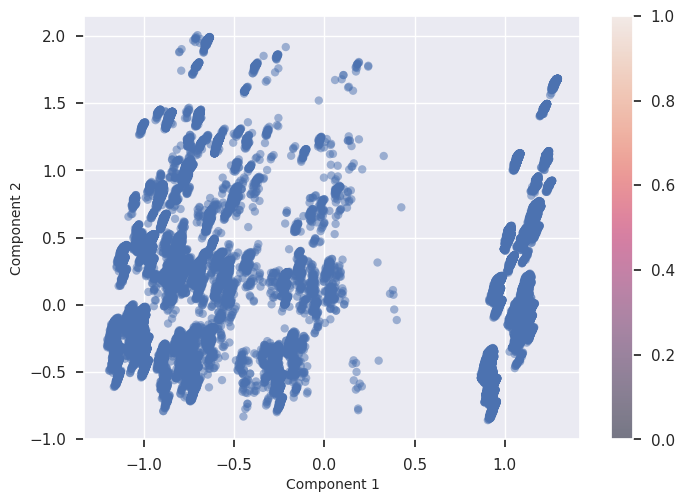

In [416]:
# Let's use PCA to visualize with only two components
pca2 = PCA(n_components = 2)
pca2.fit(df)
df_pca2 = pca2.transform(df)
print(df_pca2.shape)

# Scatter plot of the two Principal Components by the "target" to see if there is any pattern
plt.scatter(df_pca2[:, 0], df_pca2[:, 1], edgecolor='none', alpha=0.5, cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar();

###### 1 more clear vertical cluster in the right, in the left it isn't well defined so it could either represent 1 big cluster or more small clusters

In [417]:
# Use PCA to reduce dimensionality of data
pca = PCA()
pca_feat = pca.fit_transform(df)

In [418]:
# Output PCA table
pd.DataFrame(
    {"Eigenvalue": pca.explained_variance_,
     "Difference": np.insert(np.diff(pca.explained_variance_), 0, 0),
     "Proportion": pca.explained_variance_ratio_,
     "Cumulative": np.cumsum(pca.explained_variance_ratio_)},
    index=range(1, pca.n_components_ + 1)
)

Eigenvalue    Difference    Proportion  Cumulative
1   8.885128e-01  0.000000e+00  2.409850e-01    0.240985
2   3.079339e-01 -5.805789e-01  8.351870e-02    0.324504
3   2.323892e-01 -7.554469e-02  6.302925e-02    0.387533
4   2.122478e-01 -2.014133e-02  5.756647e-02    0.445099
5   2.055007e-01 -6.747165e-03  5.573648e-02    0.500836
..           ...           ...           ...         ...
59  4.161892e-33  0.000000e+00  1.128800e-33    1.000000
60  4.161892e-33  0.000000e+00  1.128800e-33    1.000000
61  4.161892e-33  0.000000e+00  1.128800e-33    1.000000
62  4.161892e-33  0.000000e+00  1.128800e-33    1.000000
63  9.108163e-34 -3.251075e-33  2.470342e-34    1.000000

[63 rows x 4 columns]

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


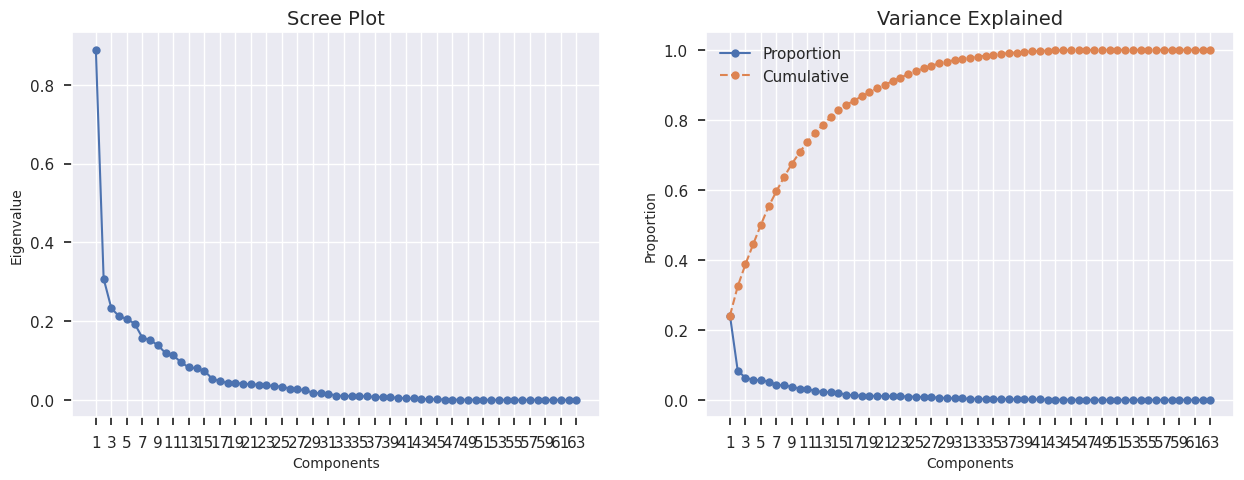

In [419]:
# figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# draw plots
ax1.plot(pca.explained_variance_, marker=".", markersize=12)
ax2.plot(pca.explained_variance_ratio_, marker=".", markersize=12, label="Proportion")
ax2.plot(np.cumsum(pca.explained_variance_ratio_), marker=".", markersize=12, linestyle="--", label="Cumulative")

# customizations
ax2.legend()
ax1.set_title("Scree Plot", fontsize=14)
ax2.set_title("Variance Explained", fontsize=14)
ax1.set_ylabel("Eigenvalue")
ax2.set_ylabel("Proportion")
ax1.set_xlabel("Components")
ax2.set_xlabel("Components")
ax1.set_xticks(range(0, pca.n_components_ , 2))
ax1.set_xticklabels(range(1, pca.n_components_ + 1, 2))
ax2.set_xticks(range(0, pca.n_components_ , 2))
ax2.set_xticklabels(range(1, pca.n_components_+ 1, 2))

plt.show()

In [420]:
# Perform PCA again with 26 components, this number of components explains 95% of the variance
pca = PCA(n_components=26)
pca_feat = pca.fit_transform(df)
pca_feat_names = [f"PC{i}" for i in range(pca.n_components_)]
pca_df = pd.DataFrame(pca_feat, index=df.index, columns=pca_feat_names)  # remember index=df_pca.index
pca_df

PC0       PC1       PC2       PC3       PC4       PC5       PC6  \
0      1.182001  0.696003  0.714813 -0.687995  0.579742  0.752218 -0.014569   
1      1.079148  1.109102 -0.759562 -0.488497  0.125305  0.430810  0.069663   
2      0.923913 -0.495033 -0.301546 -0.004372 -0.358184 -0.081988 -0.237885   
3      0.939867 -0.566356  0.154254 -0.661142  0.183849  0.130050  0.093965   
4     -1.000066 -0.131320  0.118974  0.215609 -0.940171  0.327001  0.343412   
...         ...       ...       ...       ...       ...       ...       ...   
74900 -0.300311 -0.342992 -0.257244  0.583443  0.563023 -0.026894 -0.227254   
74901 -0.002961  0.946695  1.325985 -0.445144  0.919979  0.279496  1.070694   
74902 -1.012444 -0.253579  0.082312  0.377308 -0.568549  0.406088 -0.079259   
74903 -0.991032  0.434137 -0.385509 -0.168454 -0.314172 -0.570289 -0.183040   
74904  0.959657 -0.015368 -0.695162 -0.029611  0.033543 -0.528486 -0.108299   

            PC7       PC8       PC9      PC10      PC11      PC12      PC13  \
0      0.017221  0.066937 -0.022463  0.003881  0.026648 -0.103855 -0.142769   
1      0.006308  0.045823 -0.028948 -0.069295  0.086336  0.115890  0.094981   
2      0.267201  1.099555 -0.226053 -0.426255  0.107115  0.188339  0.056645   
3     -0.250411 -0.023865  0.205108 -0.158258 -0.093935 -0.071713  0.322196   
4     -0.456205  0.426451 -0.484342 -0.211775  0.142416  0.169282  0.024134   
...         ...       ...       ...       ...       ...       ...       ...   
74900  0.299387  0.481943  0.502610 -0.435980 -0.501416  0.612765  0.997020   
74901  1.130487  0.052230  0.022433  0.264734  0.069905  0.708802  0.579991   
74902 -0.007401 -0.779795 -0.526100 -0.123584 -0.344909  0.152601 -0.441375   
74903 -0.221515 -0.314166  0.090412 -0.062544 -0.125054 -0.289842 -0.155905   
74904  0.046235 -0.679958 -0.401306 -0.045374 -0.320453  0.192926 -0.410081   

           PC14      PC15      PC16      PC17      PC18      PC19      PC20  \
0      0.248103  0.100764  0.653505  0.402091  0.162990  0.577032 -0.135480   
1     -0.270407 -0.072579 -0.093253 -0.079474  0.027533 -0.059093 -0.026922   
2     -0.288660 -0.026167  0.001395  0.010496  0.044511 -0.017185 -0.021761   
3     -0.380181 -0.232020  0.149870 -0.205835 -0.142408 -0.038062  0.159380   
4     -0.425680 -0.008539  0.038726 -0.041049  0.036436  0.017254 -0.025671   
...         ...       ...       ...       ...       ...       ...       ...   
74900  0.981523  0.920790 -0.050491  0.155313 -0.017763 -0.029022  0.040076   
74901  0.951285  0.080058 -0.020217 -0.034643 -0.090620 -0.148533  0.053294   
74902  0.238188  0.141172  0.131327 -0.078929 -0.070754 -0.038869  0.066323   
74903  0.419549 -0.140746 -0.045234 -0.084535 -0.521599 -0.031832 -0.593599   
74904  0.331916  0.082080  0.101897 -0.094632 -0.066334 -0.060580  0.049984   

           PC21      PC22      PC23      PC24      PC25  
0     -0.240885  0.070381 -0.083113 -0.024341 -0.050648  
1      0.030433 -0.014544 -0.013717 -0.003360  0.022473  
2      0.022311  0.008820  0.003267  0.002536  0.014982  
3      0.328347  0.695223 -0.372829 -0.224424 -0.002105  
4      0.017963 -0.015519  0.018483  0.018670 -0.010889  
...         ...       ...       ...       ...       ...  
74900 -0.043219  0.038791  0.048210 -0.002202  1.007461  
74901  0.053279 -0.049068  0.040571 -0.002594 -0.477312  
74902  0.023903 -0.031297  0.094534  0.018133 -0.022209  
74903 -0.383023 -0.133176 -0.253538 -0.152690 -0.021412  
74904  0.026266 -0.037411  0.069510  0.001794  0.011386  

[74905 rows x 26 columns]

In [421]:
# Reassigning df to contain pca variables
df_pca = pd.concat([df, pca_df], axis=1)
df_pca.head()

DaysSinceCreation  AverageLeadTime  DistributionChannel_Corporate  \
0           0.299481         0.161644                            1.0   
1           1.000000         0.167123                            0.0   
2           1.000000         0.254795                            0.0   
3           1.000000         0.158904                            0.0   
4           1.000000         0.104110                            0.0   

   DistributionChannel_Travel Agent/Operator  DistributionChannel_Direct  \
0                                        0.0                         0.0   
1                                        1.0                         0.0   
2                                        1.0                         0.0   
3                                        1.0                         0.0   
4                                        1.0                         0.0   

   DistributionChannel_GDS Systems  Foreigner  Region_Portugal  Region_France  \
0                              0.0        0.0              1.0            0.0   
1                              0.0        0.0              1.0            0.0   
2                              0.0        1.0              0.0            1.0   
3                              0.0        1.0              0.0            0.0   
4                              0.0        1.0              0.0            1.0   

   Region_Asia  Region_Ireland  Region_Spain  Region_Belgium  Region_Austria  \
0          0.0             0.0           0.0             0.0             0.0   
1          0.0             0.0           0.0             0.0             0.0   
2          0.0             0.0           0.0             0.0             0.0   
3          1.0             0.0           0.0             0.0             0.0   
4          0.0             0.0           0.0             0.0             0.0   

   Region_Germany  Region_Italy  Region_Eastern Europe  Region_USA  \
0             0.0           0.0                    0.0         0.0   
1             0.0           0.0                    0.0         0.0   
2             0.0           0.0                    0.0         0.0   
3             0.0           0.0                    0.0         0.0   
4             0.0           0.0                    0.0         0.0   

   Region_America  Region_Switzerland  Region_United Kingdom  \
0             0.0                 0.0                    0.0   
1             0.0                 0.0                    0.0   
2             0.0                 0.0                    0.0   
3             0.0                 0.0                    0.0   
4             0.0                 0.0                    0.0   

   Region_Scandinavia  Region_Africa  Region_Netherlands  Region_Canada  \
0                 0.0            0.0                 0.0            0.0   
1                 0.0            0.0                 0.0            0.0   
2                 0.0            0.0                 0.0            0.0   
3                 0.0            0.0                 0.0            0.0   
4                 0.0            0.0                 0.0            0.0   

   Region_Australia  Region_Western Europe  Region_Oceania  Region_Antarctica  \
0               0.0                    0.0             0.0                0.0   
1               0.0                    0.0             0.0                0.0   
2               0.0                    0.0             0.0                0.0   
3               0.0                    0.0             0.0                0.0   
4               0.0                    0.0             0.0                0.0   

   AgeCategory_18-29  AgeCategory_30-39  AgeCategory_40-49  AgeCategory_50-59  \
0                0.0                0.0                0.0                1.0   
1                0.0                0.0                1.0                0.0   
2                0.0                0.0                0.0                0.0   
3                0.0                0.0                0.0                1.0

In [422]:
df.columns.to_list()

['DaysSinceCreation',
 'AverageLeadTime',
 'DistributionChannel_Corporate',
 'DistributionChannel_Travel Agent/Operator',
 'DistributionChannel_Direct',
 'DistributionChannel_GDS Systems',
 'Foreigner',
 'Region_Portugal',
 'Region_France',
 'Region_Asia',
 'Region_Ireland',
 'Region_Spain',
 'Region_Belgium',
 'Region_Austria',
 'Region_Germany',
 'Region_Italy',
 'Region_Eastern Europe',
 'Region_USA',
 'Region_America',
 'Region_Switzerland',
 'Region_United Kingdom',
 'Region_Scandinavia',
 'Region_Africa',
 'Region_Netherlands',
 'Region_Canada',
 'Region_Australia',
 'Region_Western Europe',
 'Region_Oceania',
 'Region_Antarctica',
 'AgeCategory_18-29',
 'AgeCategory_30-39',
 'AgeCategory_40-49',
 'AgeCategory_50-59',
 'AgeCategory_60-69',
 'AgeCategory_>=70',
 'TotalRevenue',
 'PremiumServiceRate',
 'BookingSuccessRate',
 'PreferredRoomLocation_No Preference',
 'PreferredRoomLocation_High Floor',
 'PreferredRoomLocation_Low Floor',
 'PreferredRoomLocation_Medium Floor',
 'Prefer

In [423]:
def _color_red_or_green(val):
    if val < -0.45:
        color = 'background-color: red'
    elif val > 0.45:
        color = 'background-color: green'
    else:
        color = ''
    return color

# Interpreting each Principal Component
loadings = df_pca[df.columns.to_list() + pca_feat_names].corr().loc[df.columns.to_list(), pca_feat_names]
loadings.style.applymap(_color_red_or_green)

# Clustering Part

## KMeans

In [424]:
#Functions for later use

def get_ss(df):
    """Computes the sum of squares for all variables given a dataset
    """
    ss = np.sum(df.var() * (df.count() - 1))
    return ss  # return sum of sum of squares of each df variable

def r2(df, labels):
    sst = get_ss(df)
    ssw = np.sum(df.groupby(labels).apply(get_ss))
    return 1 - ssw/sst


#### Clustering using PCA

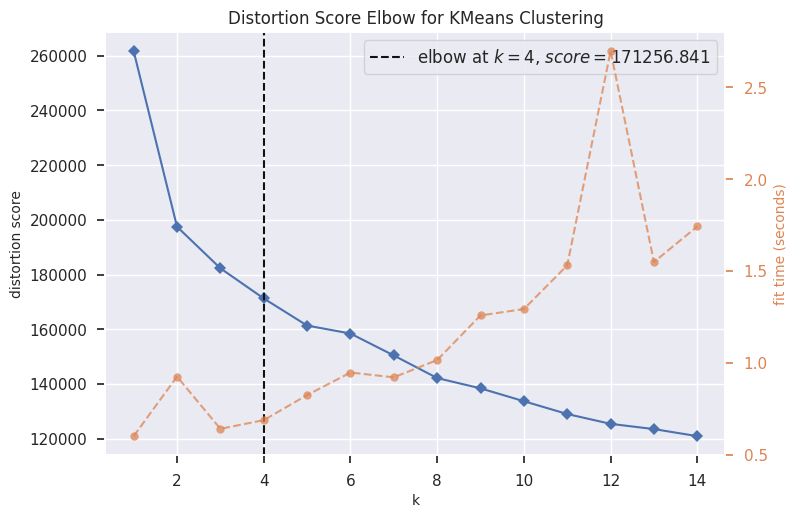

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [425]:
# Apply the Elbow method to select K
km = KMeans(init='k-means++', random_state=123)  # Specify k-means++ initialization
visualizer = KElbowVisualizer(km, k=(1,15), random_state=123)
visualizer.fit(pca_df)
visualizer.show()

In [426]:
K=4
kmeans = KMeans(n_clusters=K, init='k-means++', random_state=123)
allDistances = kmeans.fit_transform(pca_df)
y_kmeans = kmeans.predict(pca_df)

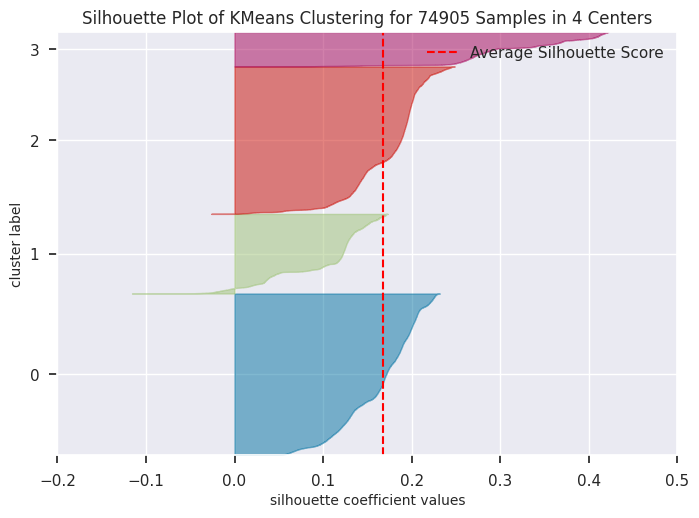

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 74905 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [427]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(pca_df)
visualizer.show()

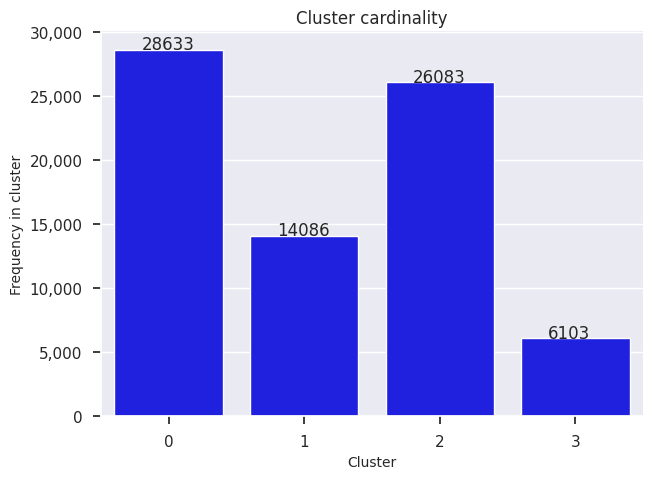

In [428]:
# Count observations per cluster
freqByCluster = df_beforeNorm.groupby(y_kmeans).size()

# Draw
fig, ax = plt.subplots(figsize=(7,5))
g = sns.countplot(x=y_kmeans, color='blue')

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
for index,data in enumerate(freqByCluster):
    plt.text(x=index-0.2 , y=data+50 , s=f"{data}" , fontdict=dict(fontsize=12))
sns.despine()
plt.title("Cluster cardinality", fontsize=12)
plt.xlabel("Cluster")
plt.ylabel("Frequency in cluster")
plt.rc('axes', labelsize=12)

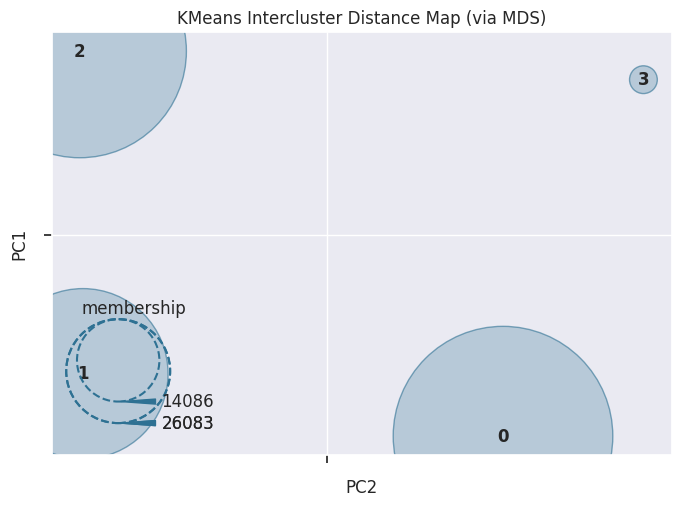

<Axes: title={'center': 'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [429]:
# Visualizing the clusters sizes and distances in 2D
visualizer = InterclusterDistance(kmeans)
visualizer.fit(pca_df)
visualizer.show()

Circles represent the clusters (0 to 3). At two dimensions it is possible to see that although the two components only represent around 32.5% of the variance, sa considered distance between clusters seems to exist.

In [430]:
means_transposed = df_beforeNorm.groupby(y_kmeans).mean().transpose()

# Style the transposed DataFrame to colorize the maximum value in each column as blue and the minimum value as red
highlighted_means = means_transposed.style.apply(lambda x: ['background-color: blue' if v == x.max() else 'background-color: red' if v == x.min() else '' for v in x], axis=1)

# Display the styled DataFrame
highlighted_means

In [431]:
pca_df_labeled=pca_df.copy()
pca_df_labeled['KMlabels']=y_kmeans

In [432]:
r2(pca_df_labeled,pca_df_labeled['KMlabels'])

0.4956405220303133

# Clustering Visualization with T-SNE

In [433]:
# This step can be quite time consuming
two_dim = TSNE(random_state=42).fit_transform(pca_df)

locator: <matplotlib.ticker.AutoLocator object at 0x7d9efac91450>


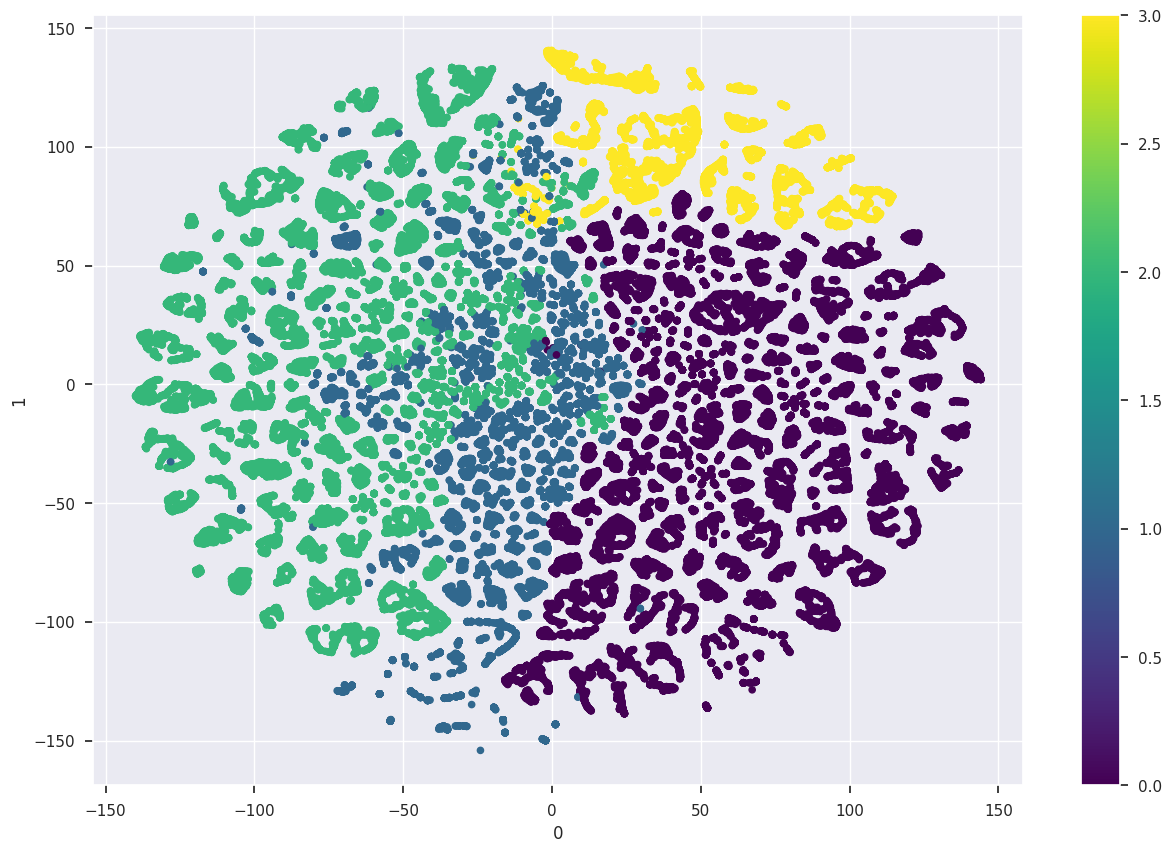

In [434]:
# t-SNE visualization
pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=y_kmeans, colormap='viridis', figsize=(15,10))
plt.show()

#### Clustering by behavioral  pesperctive

In [435]:
df_beh=df[Behavioral_perspective].copy()
df_beh

AverageLeadTime  BookingSuccessRate  PremiumServiceRate  \
0             0.161644                0.67                0.22   
1             0.167123                1.00                0.16   
2             0.254795                1.00                0.20   
3             0.158904                1.00                0.09   
4             0.104110                1.00                0.15   
...                ...                 ...                 ...   
74900         0.117808                1.00                0.16   
74901         0.019178                1.00                0.09   
74902         0.112329                1.00                0.12   
74903         0.465753                1.00                0.03   
74904         0.180822                1.00                0.21   

       AveragePersonRoom  TotalRevenue  
0               0.333333       0.07486  
1               0.333333       0.06660  
2               0.333333       0.06000  
3               0.333333       0.05080  
4               0.333333       0.12580  
...                  ...           ...  
74900           0.333333       0.20856  
74901           0.166667       0.03831  
74902           0.333333       0.02240  
74903           0.333333       0.15505  
74904           0.333333       0.17860  

[74905 rows x 5 columns]

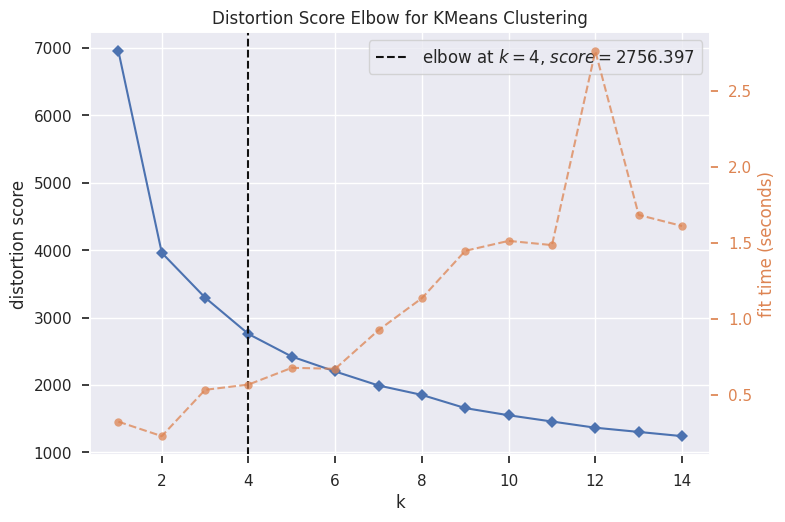

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [436]:

# Apply the Elbow method to select K
km = KMeans(init='k-means++', random_state=123)  # Specify k-means++ initialization
visualizer = KElbowVisualizer(km, k=(1,15), random_state=123)
visualizer.fit(df_beh)
visualizer.show()


In [437]:
K=3
kmeans_beh = KMeans(n_clusters=K, init='k-means++', random_state=123)
allDistances_beh = kmeans_beh.fit_transform(df_beh)
beh_kmeans = kmeans_beh.predict(df_beh)


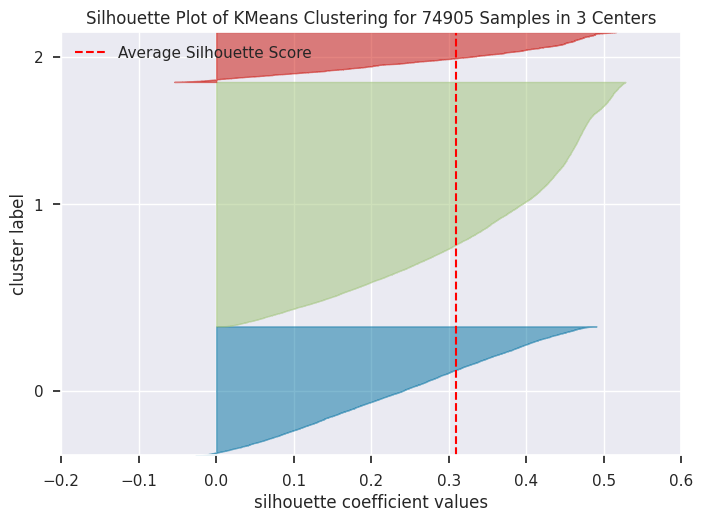

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 74905 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [438]:
visualizer = SilhouetteVisualizer(kmeans_beh, colors='yellowbrick')
visualizer.fit(df_beh)
visualizer.show()

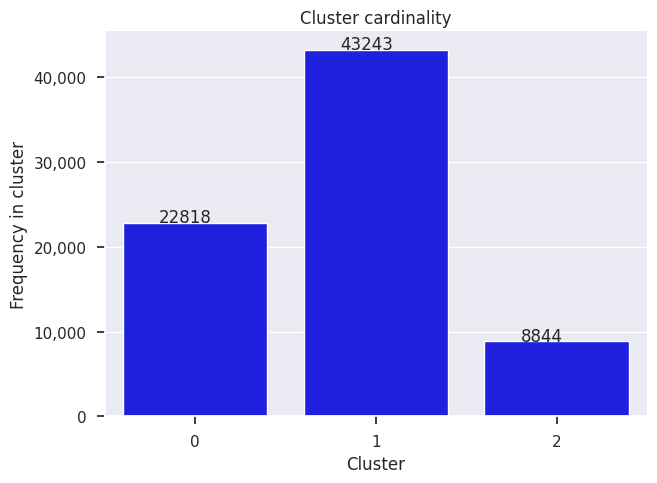

In [439]:
# Count observations per cluster
freqByCluster = df_beforeNorm[Behavioral_perspective].groupby(beh_kmeans).size()

# Draw
fig, ax = plt.subplots(figsize=(7,5))
g = sns.countplot(x=beh_kmeans, color='blue')

# Decoration
fmt = "{x:,.0f}"
tick = ticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)
for index,data in enumerate(freqByCluster):
    plt.text(x=index-0.2 , y=data+50 , s=f"{data}" , fontdict=dict(fontsize=12))
sns.despine()
plt.title("Cluster cardinality", fontsize=12)
plt.xlabel("Cluster")
plt.ylabel("Frequency in cluster")
plt.rc('axes', labelsize=12)

In [440]:
means_transposed_beh = df_beforeNorm[Behavioral_perspective].groupby(beh_kmeans).mean().transpose()

# Style the transposed DataFrame to colorize the maximum value in each column as blue and the minimum value as red
highlighted_means_beh = means_transposed_beh.style.apply(lambda x: ['background-color: blue' if v == x.max() else 'background-color: red' if v == x.min() else '' for v in x], axis=1)

# Display the styled DataFrame
highlighted_means_beh


In [441]:
df_beh_labeled=df_beh.copy()
df_beh_labeled['KMlabels']=beh_kmeans

In [442]:
r2(df_beh_labeled,df_beh_labeled['KMlabels'])

0.9084675019502352

# Clustering Visualization with T-SNE

In [443]:
# This step can be quite time consuming
two_dim = TSNE(random_state=42).fit_transform(df_beh)

locator: <matplotlib.ticker.AutoLocator object at 0x7d9f0edbcc70>


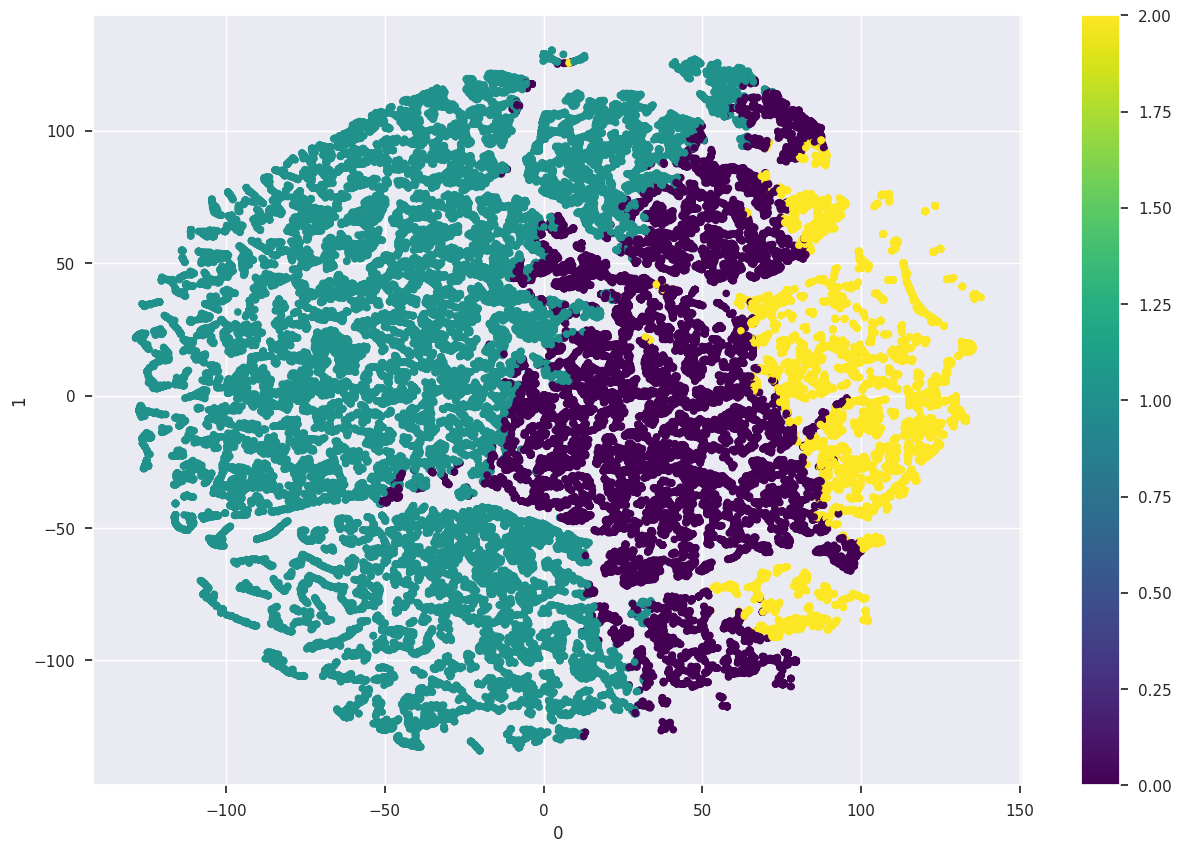

In [444]:
# t-SNE visualization
pd.DataFrame(two_dim).plot.scatter(x=0, y=1, c=beh_kmeans, colormap='viridis', figsize=(15,10))
plt.show()